In [1]:
# Load Libraries
library(Seurat)
library(SeuratWrappers)
library(reticulate)
library(dplyr)
library(data.table)
library(ggplot2)
library(gplots)
library(RColorBrewer)
library(sceasy)
library(reticulate)

#Set Options
options(future.globals.maxSize = 500000 * 1024^2) #for 200GB max size
plan("multicore", workers = 8)

# Set Working Directory
setwd("../")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




# Load & Preprocess Data

## Organoid Datasets

### WT

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


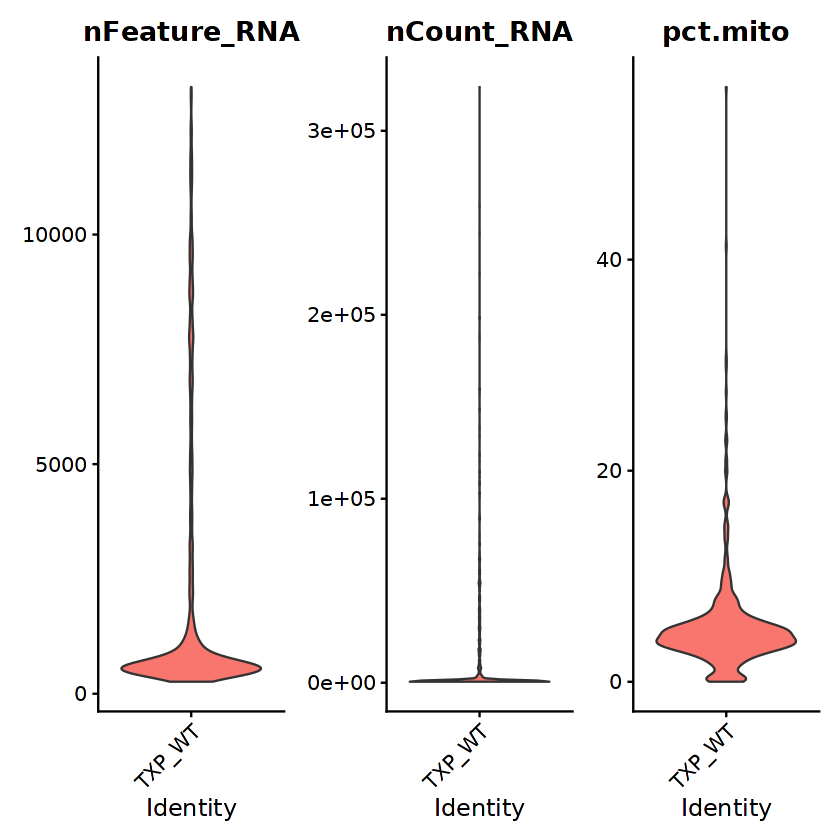

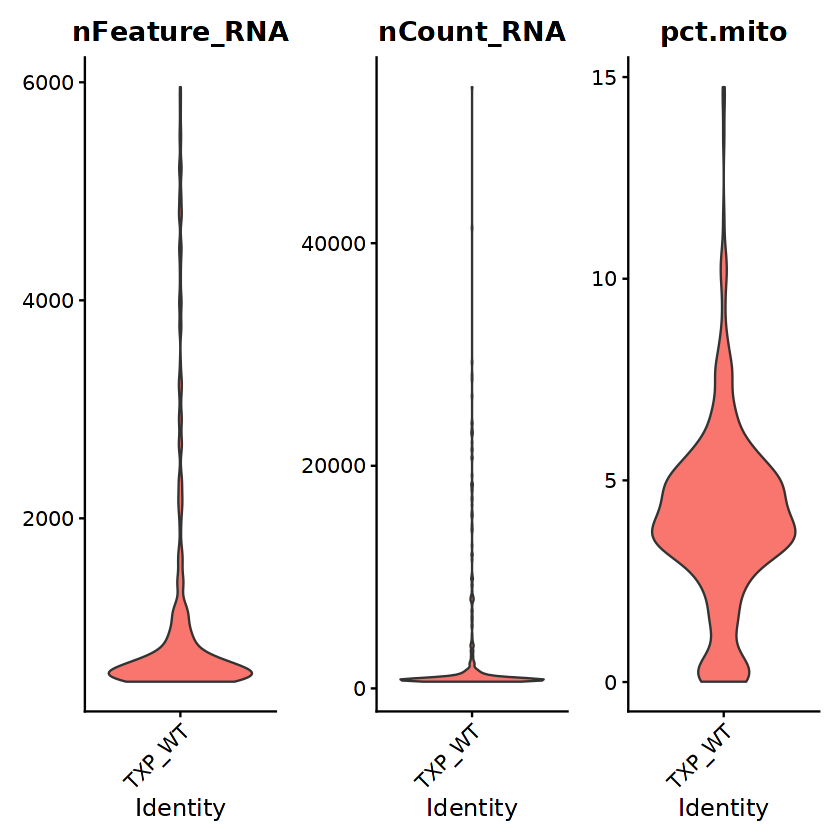

In [2]:
# Load Data - WT
counts = Read10X(data.dir = "10XData/GBMorganoids_txp/WT/outs/filtered_feature_bc_matrix")
raw.data <- CreateSeuratObject(counts = counts, project = "TXP_WT", min.cells = 3, min.features = 200)

# Quality Control Filtering
raw.data[["pct.mito"]] <- PercentageFeatureSet(raw.data, pattern = "^MT-") # calculate percentage mitochondrial genes
QCplot_1 <- VlnPlot(raw.data, features = c("nFeature_RNA", "nCount_RNA", "pct.mito"), ncol = 3, pt.size = 0)
#ggsave("GBMProject/GBMOrganoid/Figures/QC_Filtering/QCplot_1.png", plot = QCplot_1)

WT.data <- subset(raw.data, subset = nFeature_RNA > 500 & nFeature_RNA < 6000 & pct.mito < 15)
QCplot_2 <- VlnPlot(WT.data, features = c("nFeature_RNA", "nCount_RNA", "pct.mito"), ncol = 3, pt.size = 0)
#ggsave("GBMProject/GBMOrganoid/Figures/QC_Filtering/QCplot_2.png", plot = QCplot_2)

QCplot_1
QCplot_2

In [3]:
WT.data <- NormalizeData(WT.data, verbose = FALSE)
WT.data <- FindVariableFeatures(WT.data, selection.method = "vst", nfeatures = 2000, verbose = FALSE)
WT.data <- ScaleData(WT.data, features = rownames(WT.data), verbose = FALSE)
WT.data <- RunPCA(WT.data, verbose = FALSE)
WT.data <- RunUMAP(WT.data, dims = 1:30, verbose = FALSE)
WT.data <- FindNeighbors(WT.data, reduction = "pca", dims = 1:30, verbose = FALSE)
WT.data <- FindClusters(WT.data, resolution = 0.4, verbose = FALSE)
WT.data <- CellCycleScoring(WT.data, s.features = cc.genes$s.genes, g2m.features = cc.genes$g2m.genes, search = TRUE, set.ident = FALSE, verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“The following features are not present in the object: MLF1IP, attempting to find updated synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, attemptin

In [4]:
saveRDS(WT.data, file = "GBMProject/GBMOrganoid/Checkpoints/TXP_WT.rds")
WT.data

An object of class Seurat 
21230 features across 476 samples within 1 assay 
Active assay: RNA (21230 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

### PRO

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


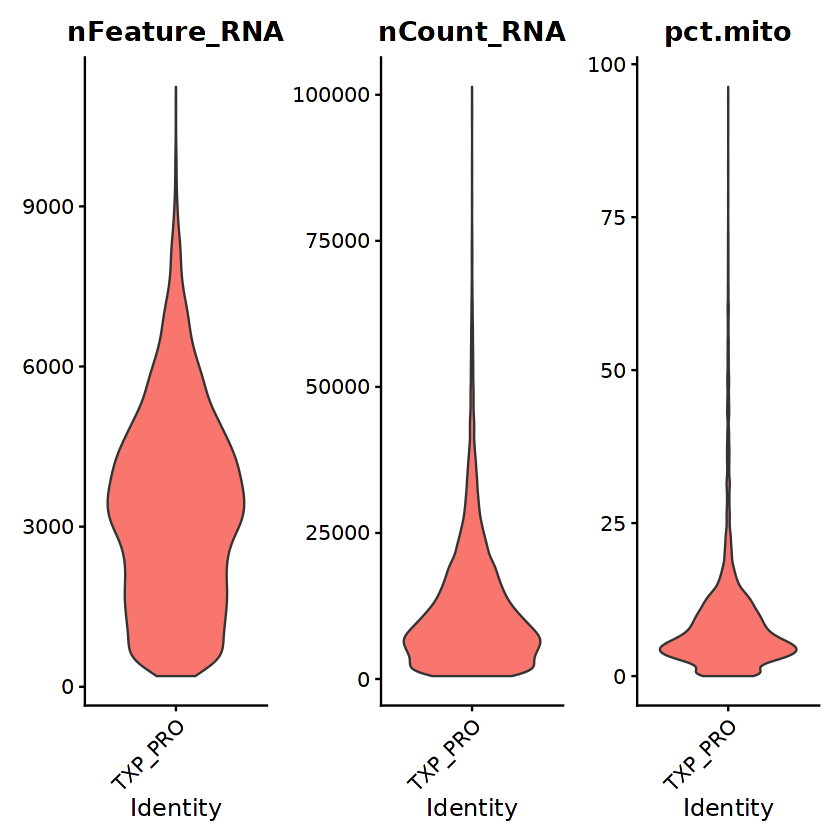

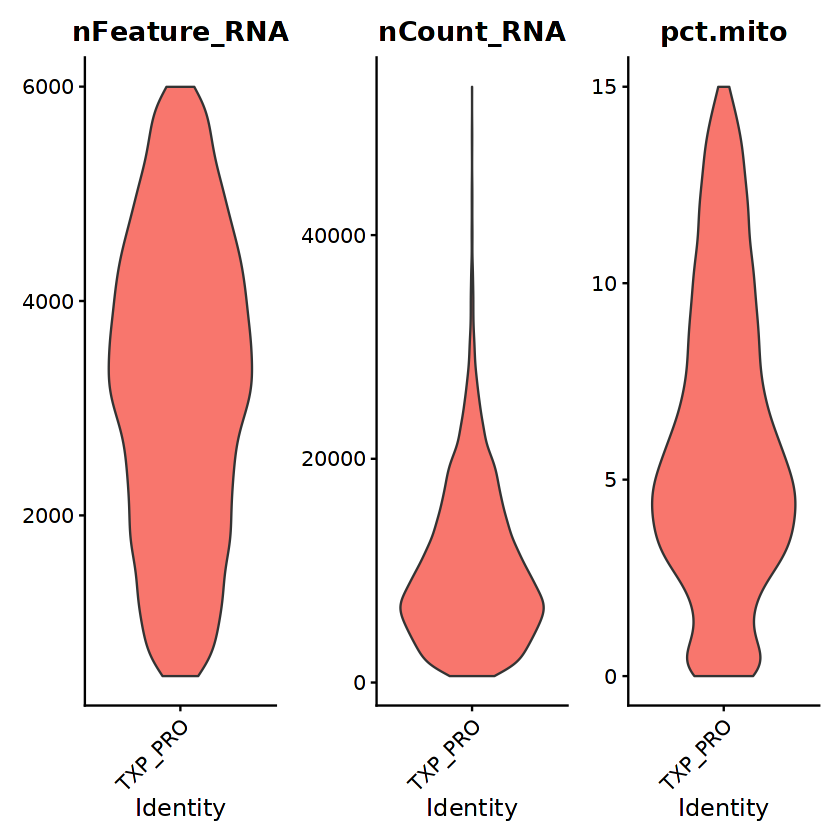

In [5]:
# Load Data - PRO (6C4)
counts = Read10X(data.dir = "10XData/GBMorganoids_txp/6C4/outs/filtered_feature_bc_matrix")
raw.data <- CreateSeuratObject(counts = counts, project = "TXP_PRO", min.cells = 3, min.features = 200)

# Quality Control Filtering
raw.data[["pct.mito"]] <- PercentageFeatureSet(raw.data, pattern = "^MT-") # calculate percentage mitochondrial genes
QCplot_1 <- VlnPlot(raw.data, features = c("nFeature_RNA", "nCount_RNA", "pct.mito"), ncol = 3, pt.size = 0)
#ggsave("GBMProject/GBMOrganoid/Figures/QC_Filtering/QCplot_1.png", plot = QCplot_1)

PRO.data <- subset(raw.data, subset = nFeature_RNA > 500 & nFeature_RNA < 6000 & pct.mito < 15)
QCplot_2 <- VlnPlot(PRO.data, features = c("nFeature_RNA", "nCount_RNA", "pct.mito"), ncol = 3, pt.size = 0)
#ggsave("GBMProject/GBMOrganoid/Figures/QC_Filtering/QCplot_2.png", plot = QCplot_2)

QCplot_1
QCplot_2

In [6]:
PRO.data <- NormalizeData(PRO.data, verbose = FALSE)
PRO.data <- FindVariableFeatures(PRO.data, selection.method = "vst", nfeatures = 2000, verbose = FALSE)
PRO.data <- ScaleData(PRO.data, features = rownames(PRO.data), verbose = FALSE)
PRO.data <- RunPCA(PRO.data, verbose = FALSE)
PRO.data <- RunUMAP(PRO.data, dims = 1:30, verbose = FALSE)
PRO.data <- FindNeighbors(PRO.data, reduction = "pca", dims = 1:30, verbose = FALSE)
PRO.data <- FindClusters(PRO.data, resolution = 0.4, verbose = FALSE)
PRO.data <- CellCycleScoring(PRO.data, s.features = cc.genes$s.genes, g2m.features = cc.genes$g2m.genes, search = TRUE, set.ident = FALSE, verbose = FALSE)

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“The following features are not present in the object: MLF1IP, attempting to find updated synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, attempting to find updated synonyms”


In [7]:
saveRDS(PRO.data, file = "GBMProject/GBMOrganoid/Checkpoints/TXP_PRO.rds")
PRO.data

An object of class Seurat 
28499 features across 10103 samples within 1 assay 
Active assay: RNA (28499 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

### MES

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


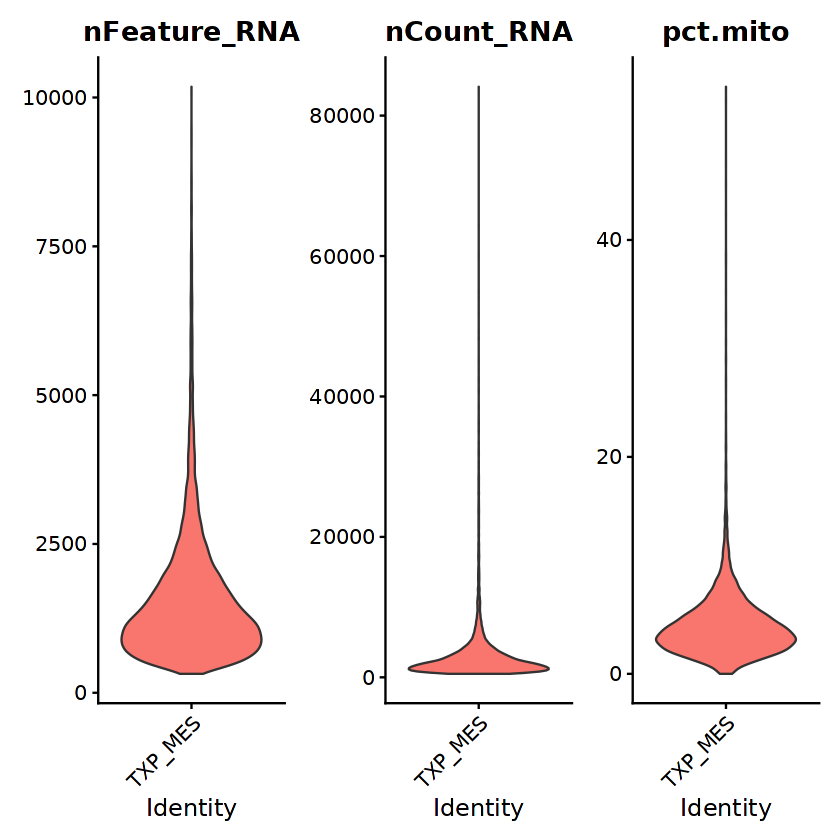

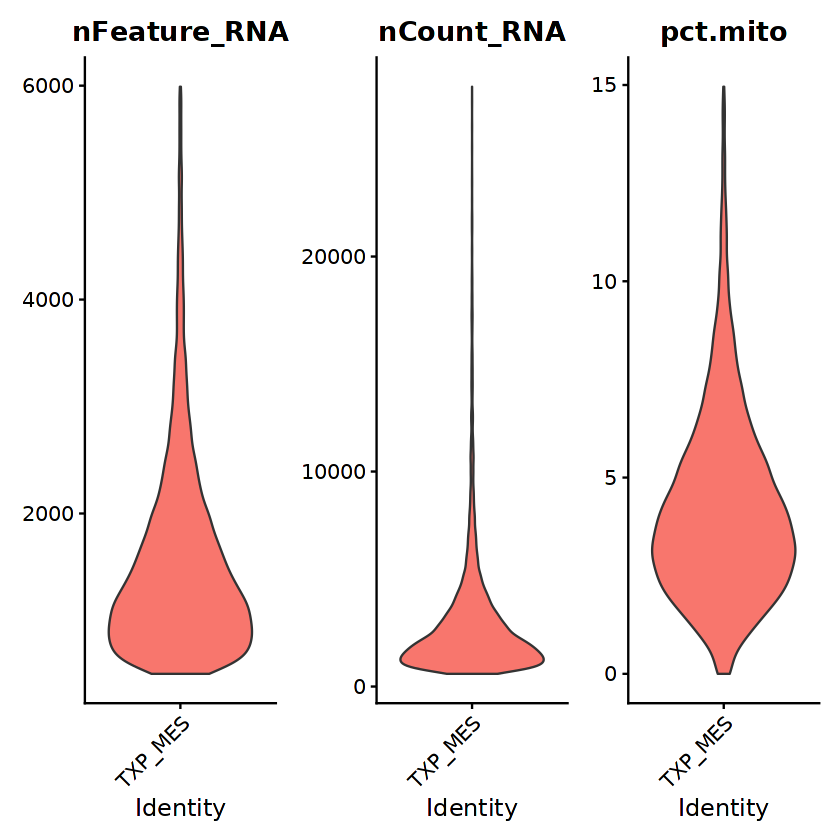

In [8]:
# Load Data - MES (4D11)
counts = Read10X(data.dir = "10XData/GBMorganoids_txp/4D11/outs/filtered_feature_bc_matrix")
raw.data <- CreateSeuratObject(counts = counts, project = "TXP_MES", min.cells = 3, min.features = 200)

# Quality Control Filtering
raw.data[["pct.mito"]] <- PercentageFeatureSet(raw.data, pattern = "^MT-") # calculate percentage mitochondrial genes
QCplot_1 <- VlnPlot(raw.data, features = c("nFeature_RNA", "nCount_RNA", "pct.mito"), ncol = 3, pt.size = 0)
#ggsave("GBMProject/GBMOrganoid/Figures/QC_Filtering/QCplot_1.png", plot = QCplot_1)

MES.data <- subset(raw.data, subset = nFeature_RNA > 500 & nFeature_RNA < 6000 & pct.mito < 15)
QCplot_2 <- VlnPlot(MES.data, features = c("nFeature_RNA", "nCount_RNA", "pct.mito"), ncol = 3, pt.size = 0)
#ggsave("GBMProject/GBMOrganoid/Figures/QC_Filtering/QCplot_2.png", plot = QCplot_2)

QCplot_1
QCplot_2

In [9]:
MES.data <- NormalizeData(MES.data, verbose = FALSE)
MES.data <- FindVariableFeatures(MES.data, selection.method = "vst", nfeatures = 2000, verbose = FALSE)
MES.data <- ScaleData(MES.data, features = rownames(MES.data), verbose = FALSE)
MES.data <- RunPCA(MES.data, verbose = FALSE)
MES.data <- RunUMAP(MES.data, dims = 1:30, verbose = FALSE)
MES.data <- FindNeighbors(MES.data, reduction = "pca", dims = 1:30, verbose = FALSE)
MES.data <- FindClusters(MES.data, resolution = 0.4, verbose = FALSE)
MES.data <- CellCycleScoring(MES.data, s.features = cc.genes$s.genes, g2m.features = cc.genes$g2m.genes, search = TRUE, set.ident = FALSE, verbose = FALSE)

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“The following features are not present in the object: MLF1IP, attempting to find updated synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, attempting to find updated synonyms”


In [10]:
saveRDS(MES.data, file = "GBMProject/GBMOrganoid/Checkpoints/TXP_MES.rds")
MES.data

An object of class Seurat 
25595 features across 12452 samples within 1 assay 
Active assay: RNA (25595 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

## Neftel Dataset

In [11]:
# Set working directory
setwd("/storage1/fs1/jmillman/Active/Matt/GBMProject") # working directory

In [12]:
# Load raw counts
expmtx1 <- ReadMtx(mtx = "10XData/Neftel10X/IDHwtGBM.processed.10X.counts.mtx",features = "10XData/Neftel10X/genes1.tsv",cells = "10XData/Neftel10X/cells1.proc.tsv")
expmtx2 <- ReadMtx(mtx = "10XData/Neftel10X/IDHwtGBM.processed.10X.counts.2.mtx",features = "10XData/Neftel10X/genes2.tsv",cells = "10XData/Neftel10X/cells2.proc.tsv")

In [13]:
raw_smartseq <- read.table("10XData/Neftel10X/GSM3828672_Smartseq2_GBM_IDHwt_processed_TPM.tsv", header = TRUE, row.names = 'GENE')
x <- gsub('[.]', '_', colnames(raw_smartseq))
colnames(raw_smartseq) <- x

In [14]:
#Initialize Seurat object with raw counts
n1.data = CreateSeuratObject(counts = expmtx1, min.cells = 3, min.features = 200)
n2.data = CreateSeuratObject(counts = expmtx1, min.cells = 3, min.features = 200)
smartseq.data <- CreateSeuratObject(counts = raw_smartseq, min.cells = 3, min.features = 3000)

neftel.data <- merge(n1.data, y = c(n2.data,smartseq.data), project = "NeftelData")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


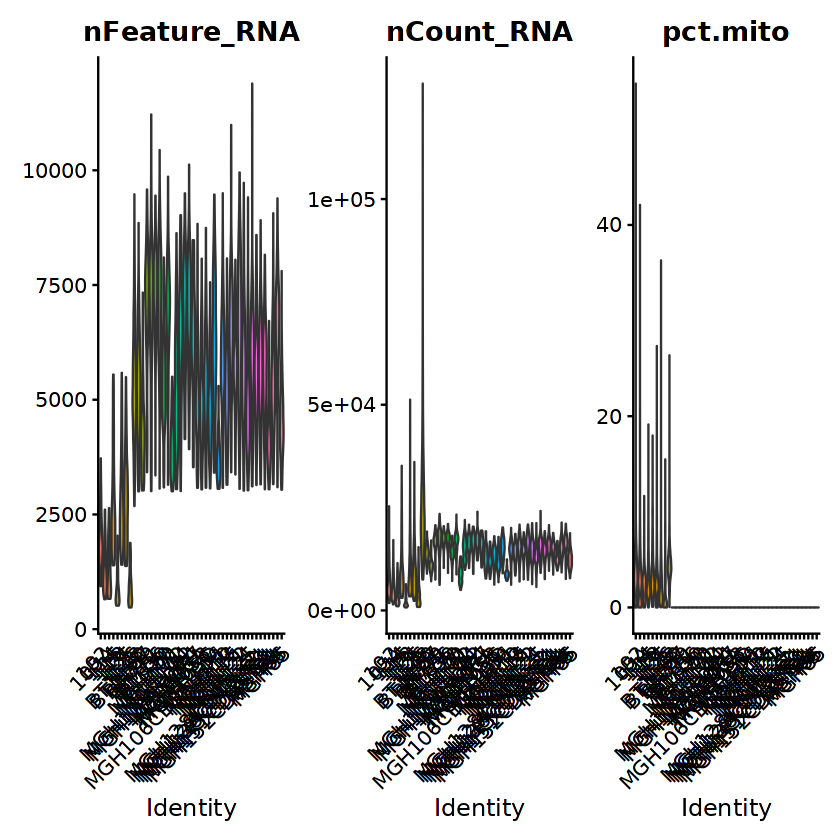

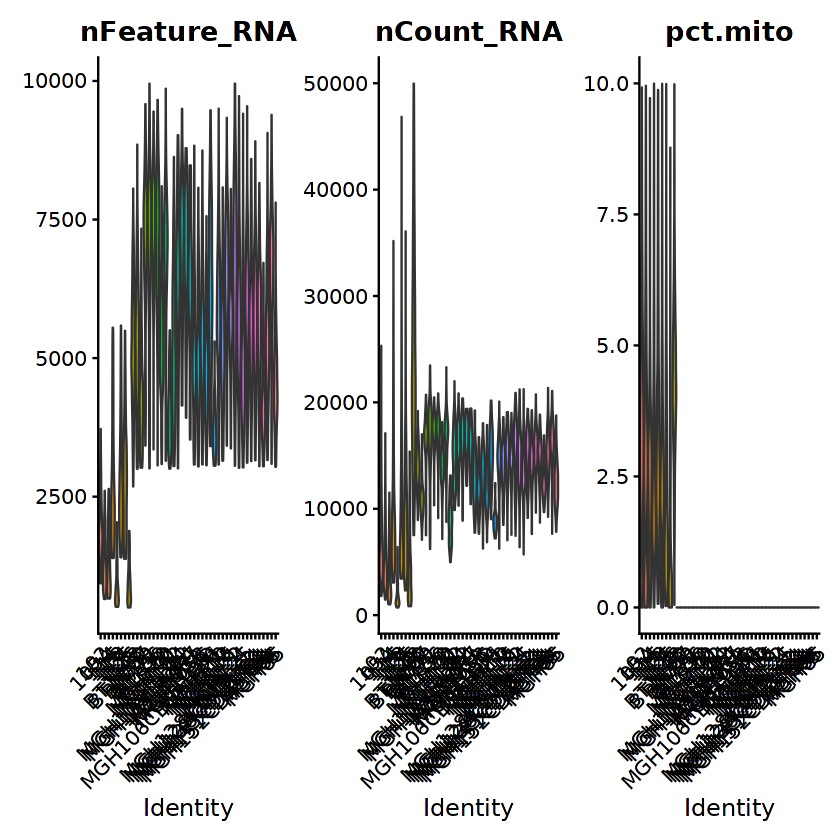

In [15]:
# Quality Control Filtering
neftel.data[["pct.mito"]] <- PercentageFeatureSet(neftel.data, pattern = "^MT-") # calculate percentage mitochondrial genes
QCplot_1 <- VlnPlot(neftel.data, features = c("nFeature_RNA", "nCount_RNA", "pct.mito"), ncol = 3, pt.size = 0)
QCplot_1

neftel.data <- subset(neftel.data, subset = nFeature_RNA > 500 & nFeature_RNA < 10000 & pct.mito < 10 & nCount_RNA < 50000)
QCplot_2 <- VlnPlot(neftel.data, features = c("nFeature_RNA", "nCount_RNA", "pct.mito"), ncol = 3, pt.size = 0)
QCplot_2

In [16]:
neftel.data[["RNA"]] <- JoinLayers(neftel.data[["RNA"]])

In [17]:
neftel.data <- NormalizeData(neftel.data, verbose = FALSE)
neftel.data <- FindVariableFeatures(neftel.data, selection.method = "vst", nfeatures = 2000, verbose = FALSE)
neftel.data <- ScaleData(neftel.data, features = rownames(neftel.data), vars.to.regress = c("nFeature_RNA", "nCount_RNA", "pct.mito"), verbose = FALSE)
neftel.data <- RunPCA(neftel.data, verbose = FALSE)
neftel.data <- RunUMAP(neftel.data, dims = 1:30, verbose = FALSE)
neftel.data <- FindNeighbors(neftel.data, reduction = "pca", dims = 1:30, verbose = FALSE)
neftel.data <- FindClusters(neftel.data, resolution = 0.4, verbose = FALSE)
neftel.data <- CellCycleScoring(neftel.data, s.features = cc.genes$s.genes, g2m.features = cc.genes$g2m.genes, search = TRUE, set.ident = FALSE, verbose = FALSE)

Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


In [18]:
# Module Scores
mac.genes = c("CD14","AIF1", "FCER1G","FCGR3A","TYROBP","CSF1R") 
t.genes = c("CD2", "CD3D", "CD3E", "CD3G") 
olig.genes = c("MBP", "TF", "PLP1", "MAG", "MOG", "CLDN11")

In [19]:
neftel.data <- AddModuleScore(neftel.data, features = list(mac.genes), name = "MacrophageScore", search = TRUE)
neftel.data <- AddModuleScore(neftel.data, features = list(t.genes), name = "TCellScore", search = TRUE)
neftel.data <- AddModuleScore(neftel.data, features = list(olig.genes), name = "OligScore", search = TRUE)

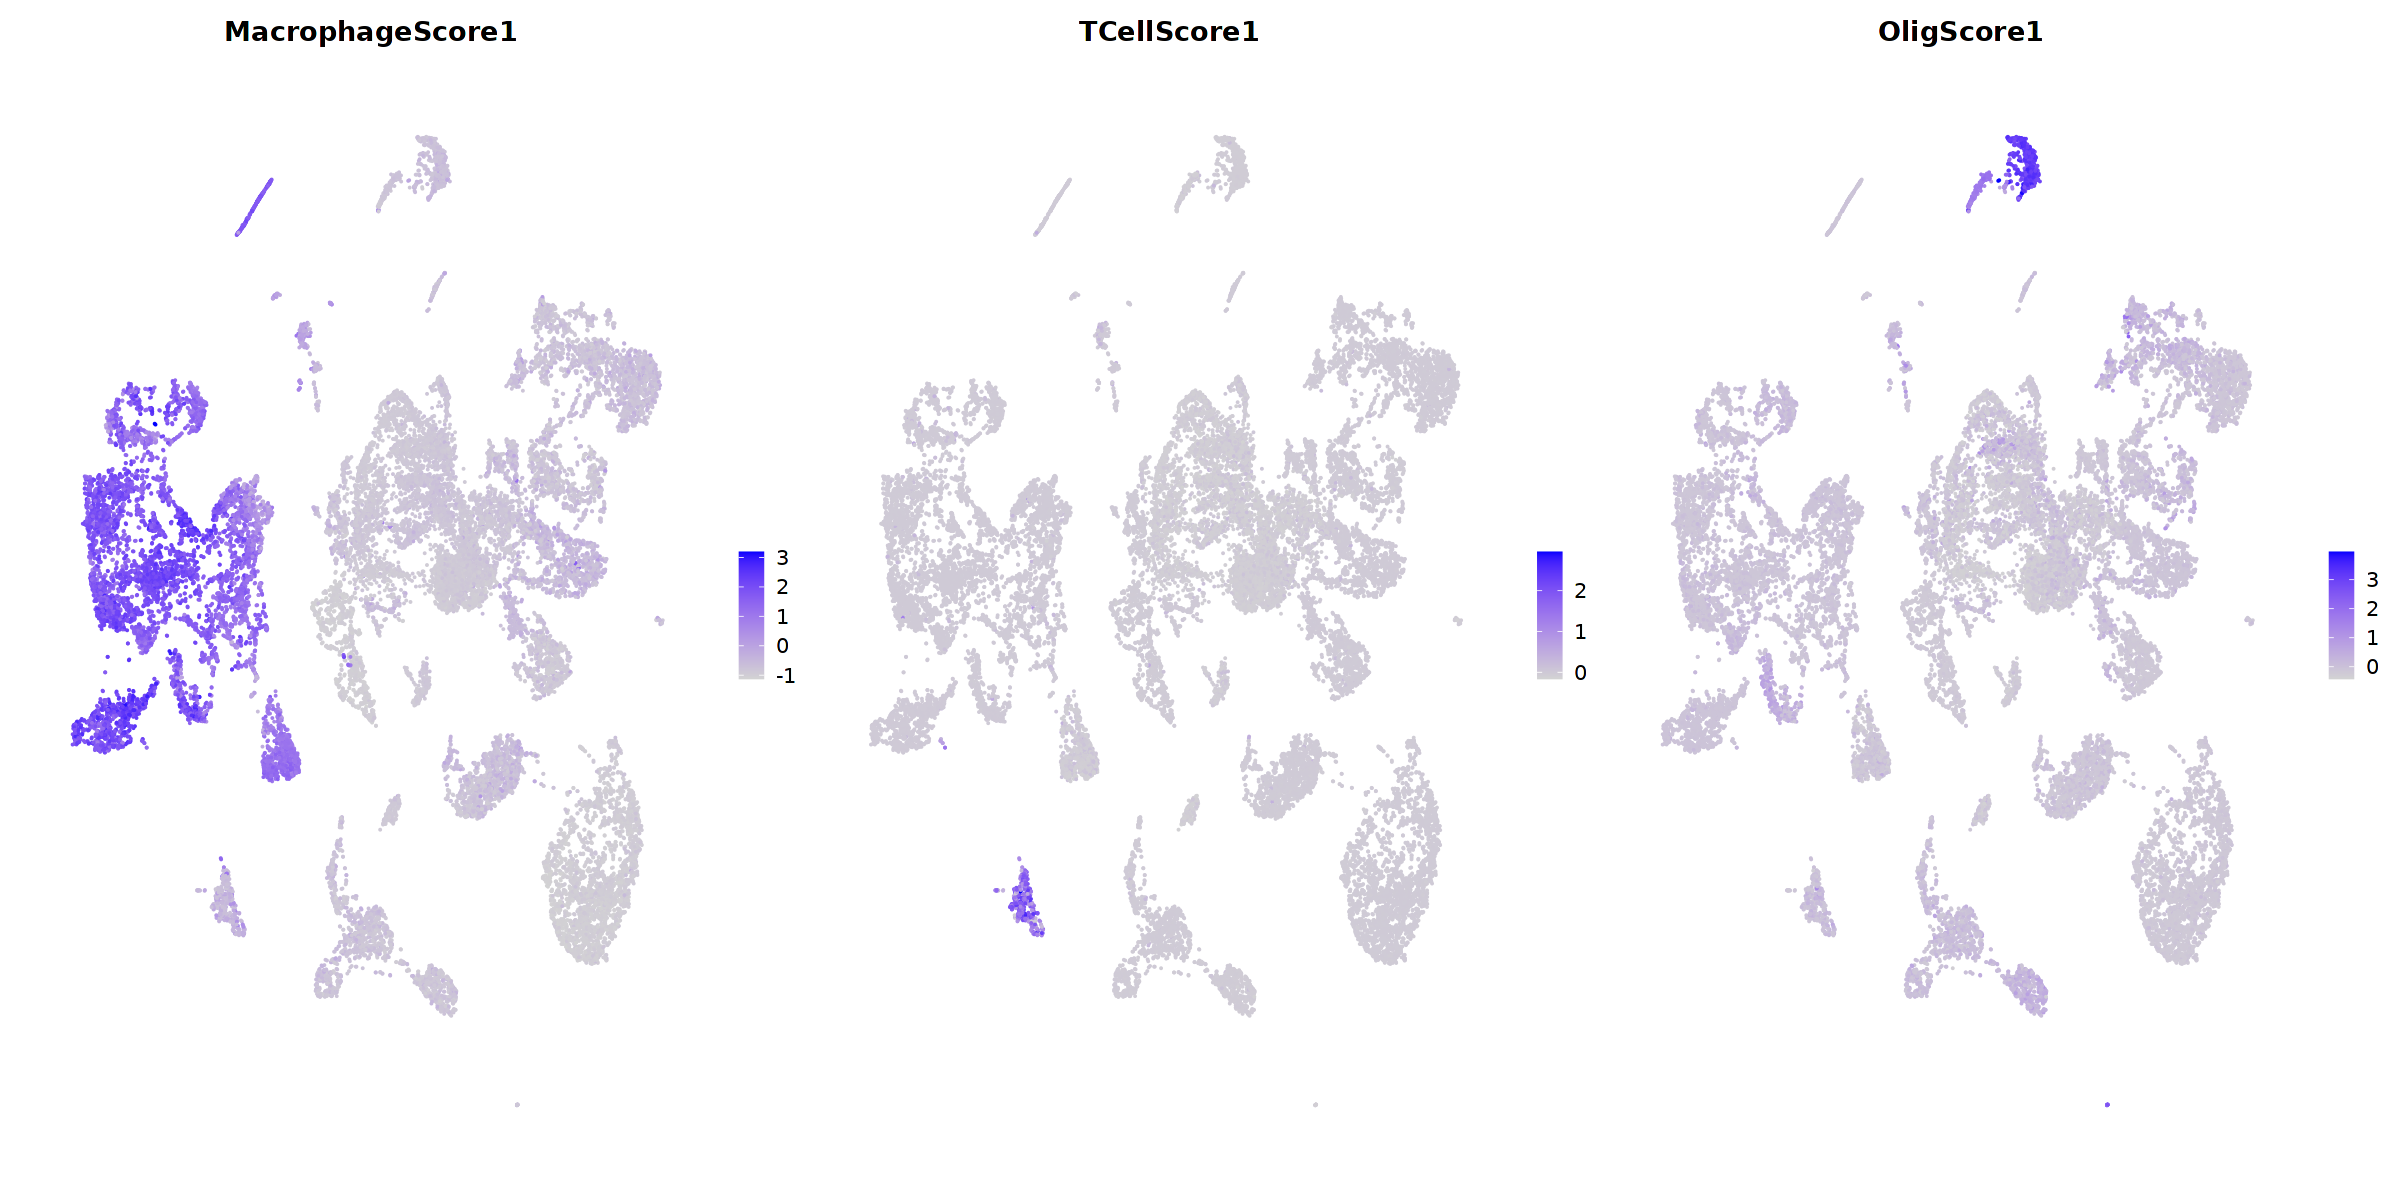

In [20]:
umap.mac <- FeaturePlot(neftel.data, reduction = "umap", features = 'MacrophageScore1') + NoAxes()
umap.t <- FeaturePlot(neftel.data, reduction = "umap", features = 'TCellScore1') + NoAxes() 
umap.olig <- FeaturePlot(neftel.data, reduction = "umap", features = 'OligScore1') + NoAxes() 

options(repr.plot.width=20, repr.plot.height=10) 
umap.mac | umap.t | umap.olig

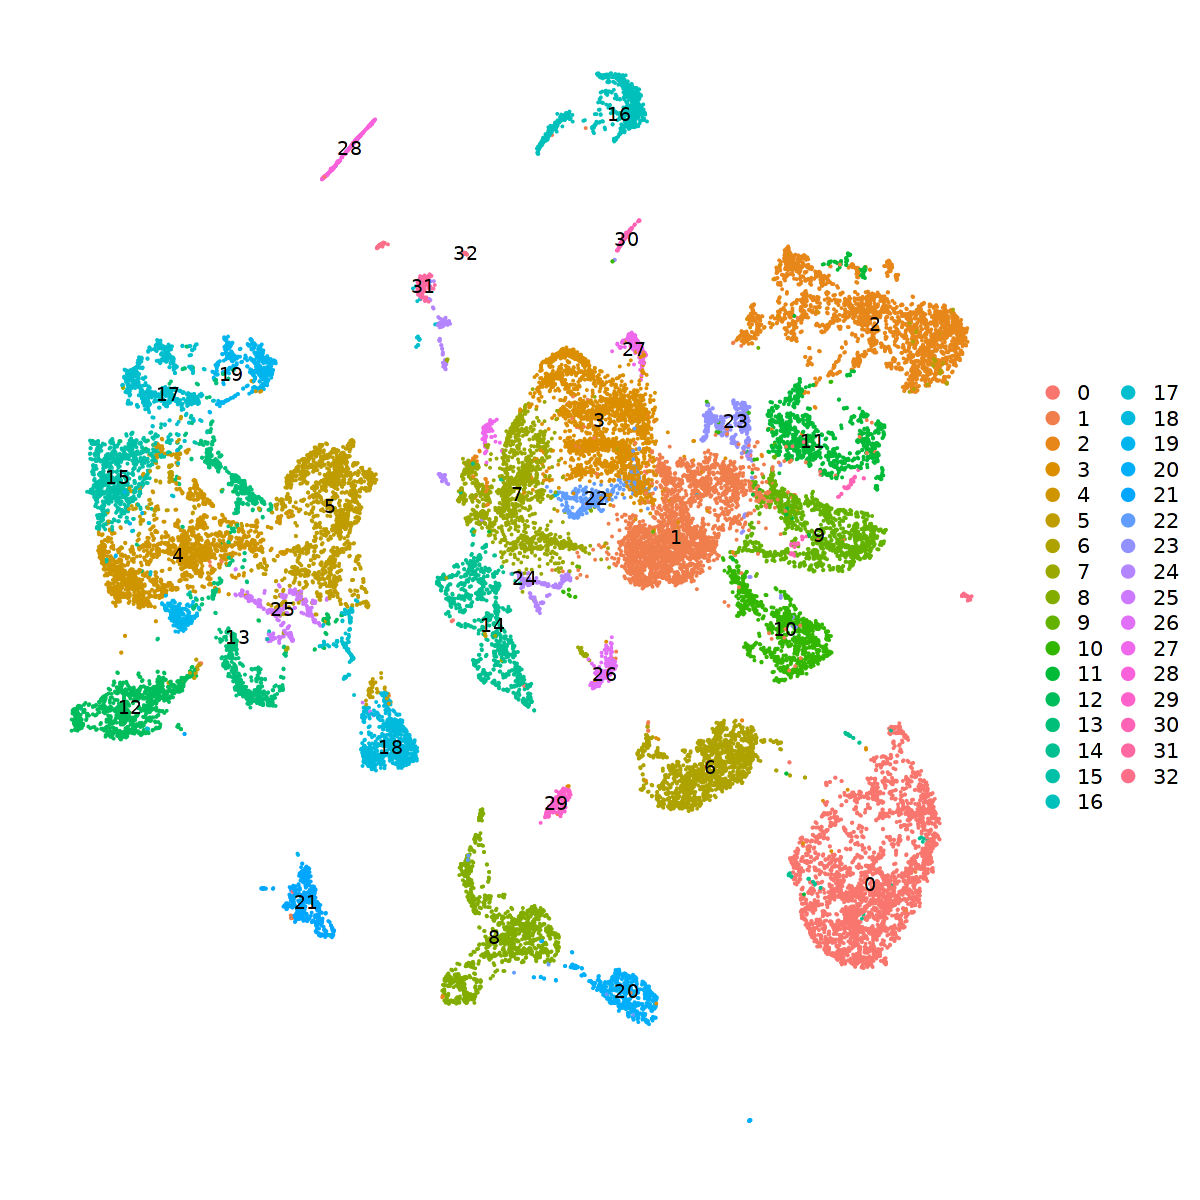

In [21]:
options(repr.plot.width=10, repr.plot.height=10) # To set the figure size in Jupyter
DimPlot(neftel.data, reduction = "umap", label=TRUE) + NoAxes()

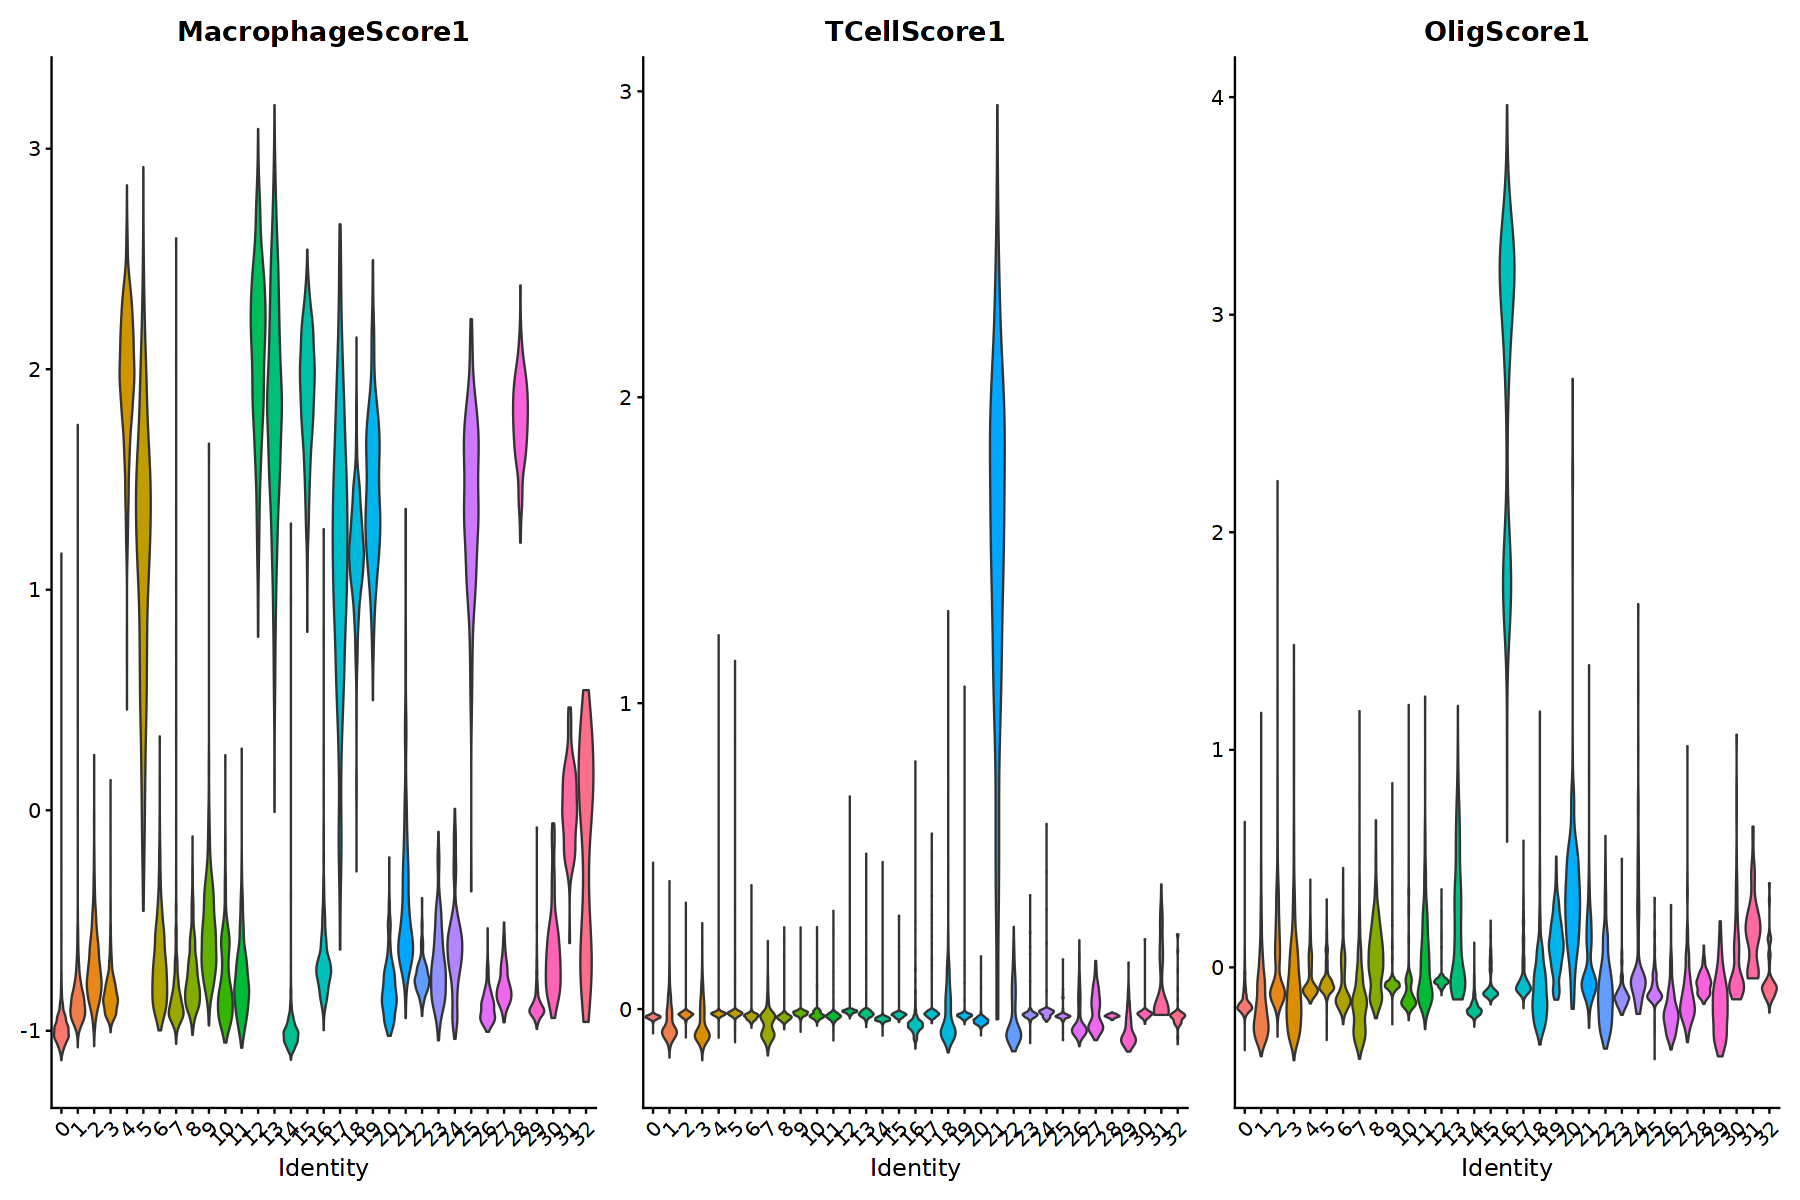

In [22]:
Idents(neftel.data) <- "seurat_clusters"

vln1 <- VlnPlot(neftel.data, features = 'MacrophageScore1', pt.size = 0) + NoLegend()
vln2 <- VlnPlot(neftel.data, features = 'TCellScore1', pt.size = 0) + NoLegend()
vln3 <- VlnPlot(neftel.data, features = 'OligScore1', pt.size = 0) + NoLegend()

options(repr.plot.width=15, repr.plot.height=10)
vln1 | vln2 | vln3

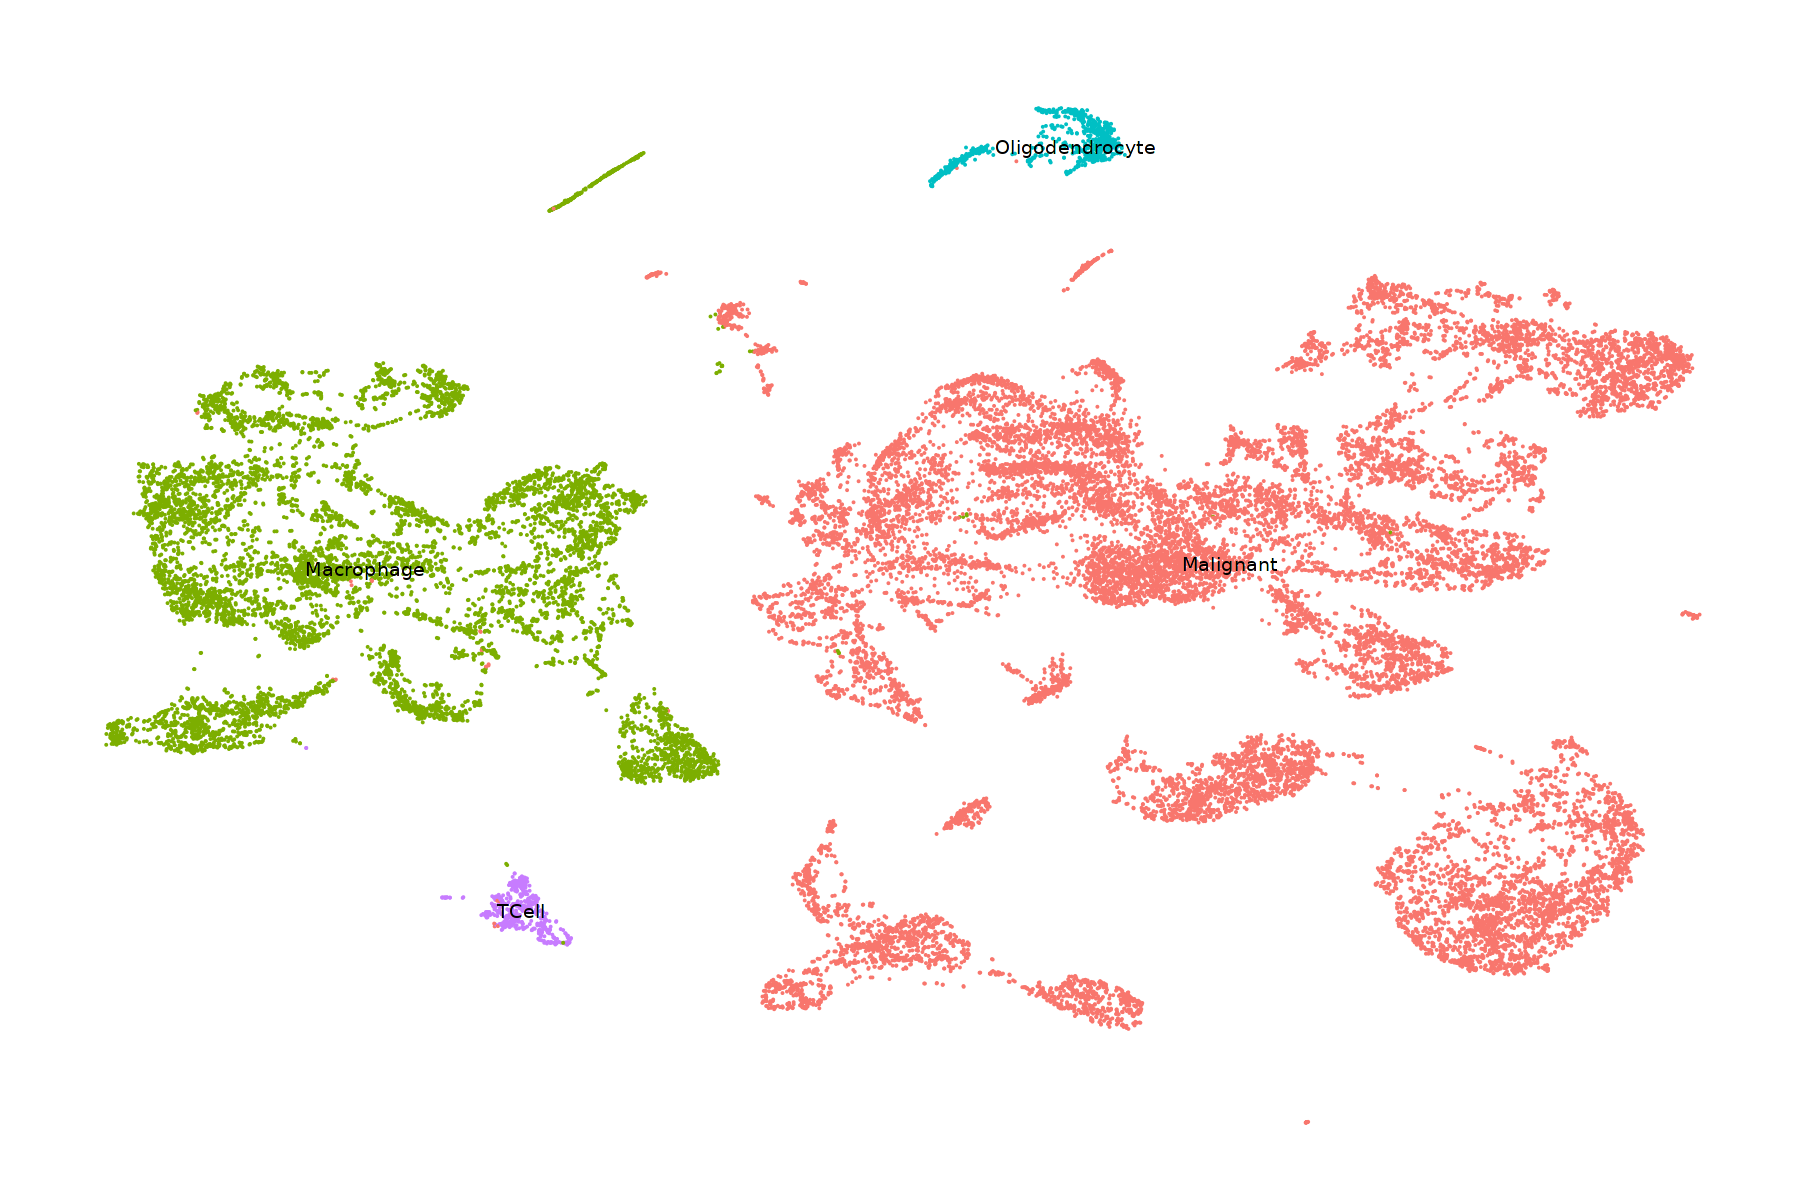

In [23]:
# Set cell types
Idents(neftel.data) <- "seurat_clusters"
neftel.data[["celltype"]] <- Idents(neftel.data)
Idents(neftel.data) <- "celltype"
neftel.data <- RenameIdents(object = neftel.data, `0` = "Malignant",`1` = "Malignant",`2` = "Malignant",
                     `3` = "Malignant",`4` = "Macrophage",`5` = "Macrophage",`6` = "Malignant",
                     `7` = "Malignant",`8` = "Malignant",`9` = "Malignant",`10` = "Malignant",`11` = "Malignant",`12` = "Macrophage",
                     `13` = "Macrophage",`14` = "Malignant",`15` = "Macrophage",`16` = 'Oligodendrocyte', `17` = 'Macrophage',
                     `18` = "Macrophage",`19` = "Macrophage",`20` = "Malignant",`21` = 'TCell', `22` = 'Malignant',`23` = 'Malignant',
                     `24` = 'Malignant',`25` = "Macrophage",`26` = "Malignant",`27` = "Malignant",`28` = 'Macrophage',
                     `29` = 'Malignant',`30` = "Malignant",`31` = "Malignant",`32` = "Malignant")
neftel.data[["celltype"]] <- Idents(neftel.data)

DimPlot(neftel.data, group.by = "celltype", label = TRUE) + NoLegend() + NoAxes() + ggtitle("")
#ggsave("GBMProject/GBMOrganoid/Figures/UMAPs/1mo_celltype.png", plot = umap.celltype)

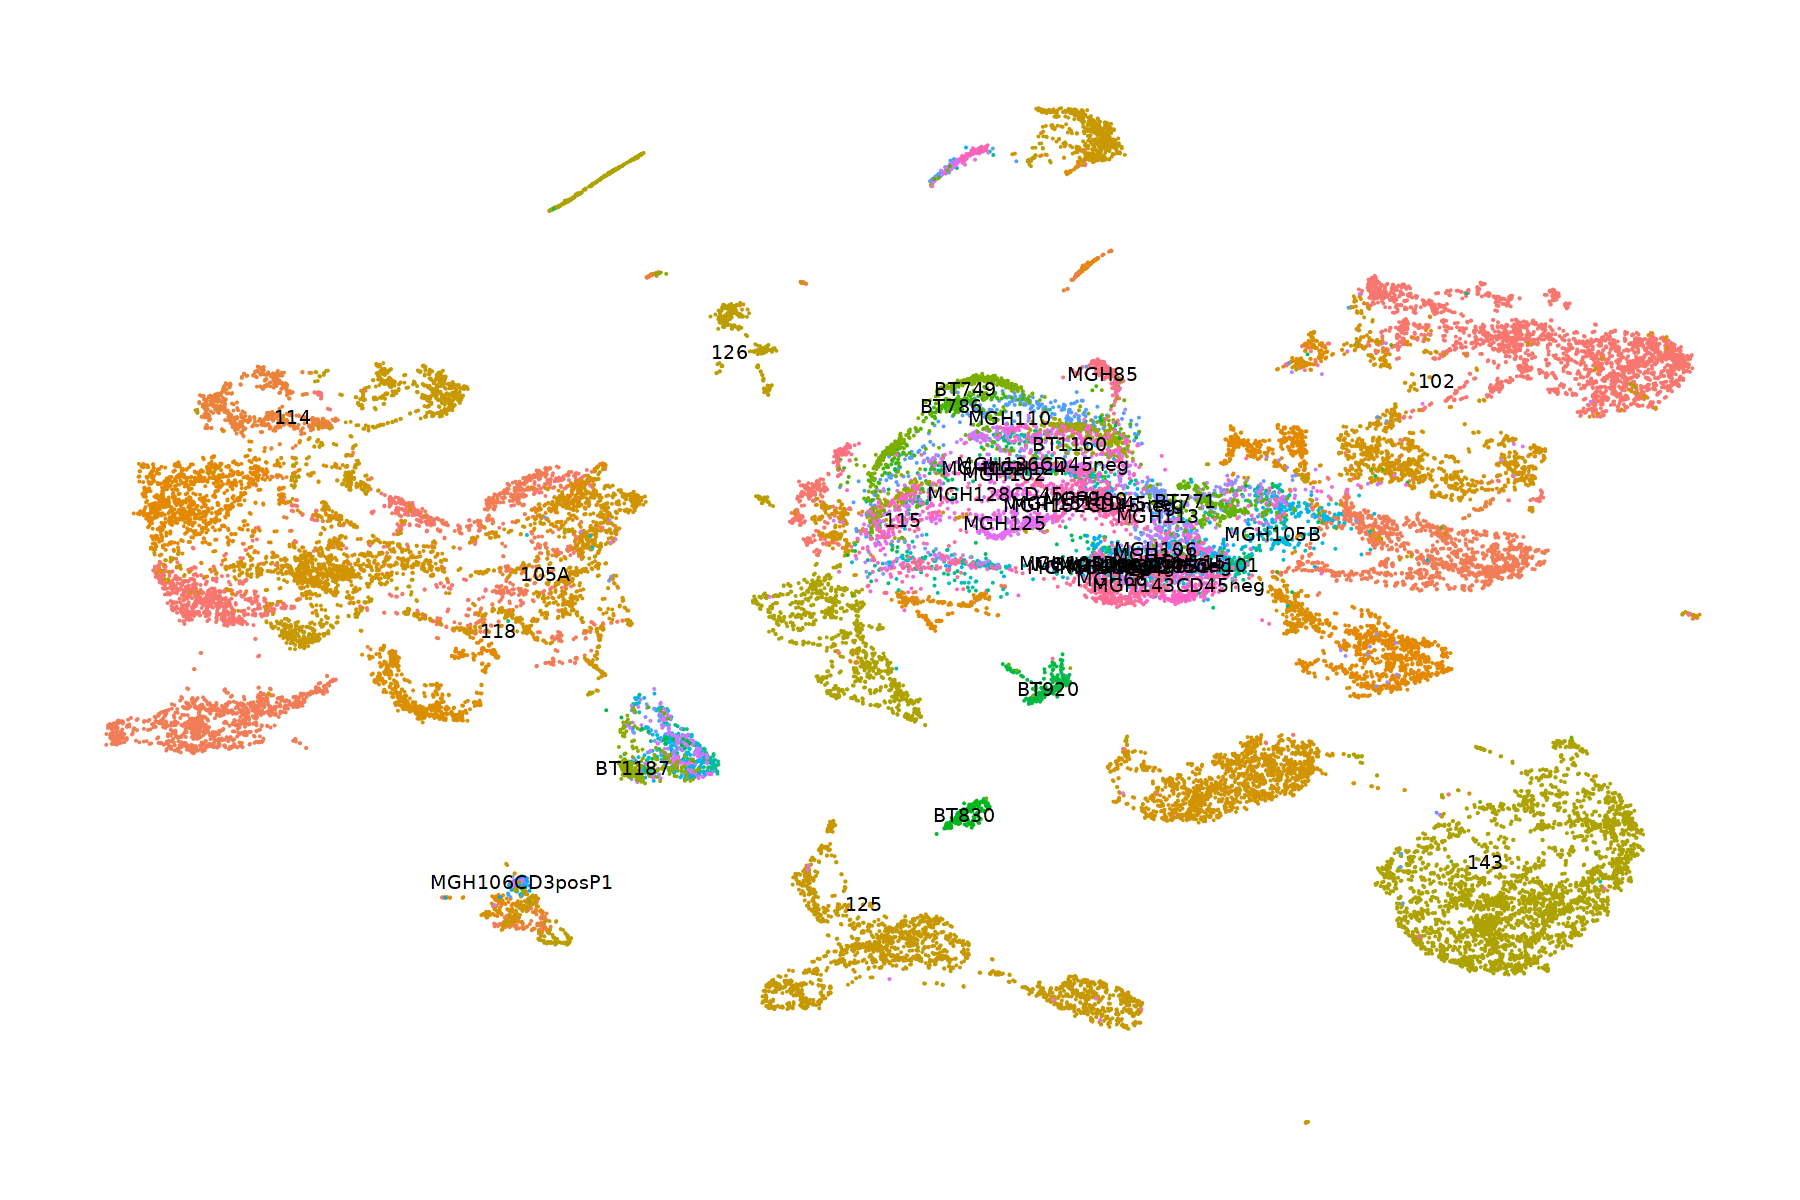

In [24]:
DimPlot(neftel.data, group.by = "orig.ident", label = TRUE) + NoLegend() + NoAxes() + ggtitle("")

In [25]:
# Set Working Directory
setwd("/storage1/fs1/jmillman/Active/Matt")

# Save
saveRDS(neftel.data, file = "GBMProject/GBMOrganoid/Checkpoints/Neftel.rds")
neftel.data

An object of class Seurat 
28500 features across 31244 samples within 1 assay 
Active assay: RNA (28500 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

# Integration

In [26]:
txp.data <- merge(x = PRO.data, y = c(WT.data,MES.data,neftel.data))
txp.data

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


An object of class Seurat 
40124 features across 54275 samples within 1 assay 
Active assay: RNA (40124 features, 2000 variable features)
 12 layers present: counts.TXP_PRO, counts.TXP_WT, counts.TXP_MES, counts.NeftelData, data.TXP_PRO, scale.data.TXP_PRO, data.TXP_WT, scale.data.TXP_WT, data.TXP_MES, scale.data.TXP_MES, data.NeftelData, scale.data.NeftelData

In [27]:
txp.data <- NormalizeData(txp.data, verbose=FALSE)
txp.data <- FindVariableFeatures(txp.data, verbose=FALSE)
txp.data <- ScaleData(txp.data, verbose=FALSE)
txp.data <- RunPCA(txp.data, verbose=FALSE)

In [28]:
txp.data <- IntegrateLayers(
  object = txp.data, method = CCAIntegration, assay = 'RNA',
  orig.reduction = "pca", new.reduction = "integrated.cca",
  verbose = FALSE
)

txp.data <- FindNeighbors(txp.data, reduction = "integrated.cca", dims = 1:30, verbose=FALSE)
txp.data <- FindClusters(txp.data, resolution = 0.6, cluster.name = "cca_clusters", verbose=FALSE)
txp.data <- RunUMAP(txp.data, reduction = "integrated.cca", dims = 1:30, reduction.name = "umap.integrated.cca", verbose=FALSE)

Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


In [29]:
txp.data <- IntegrateLayers(
  object = txp.data, method = RPCAIntegration, assay = 'RNA',
  orig.reduction = "pca", new.reduction = "integrated.rpca", k.weight = 80,
  verbose = FALSE
)

txp.data <- FindNeighbors(txp.data, reduction = "integrated.rpca", dims = 1:30, verbose=FALSE)
txp.data <- FindClusters(txp.data, resolution = 0.6, cluster.name = "rpca_clusters", verbose=FALSE)
txp.data <- RunUMAP(txp.data, reduction = "integrated.rpca", dims = 1:30, reduction.name = "umap.integrated.rpca", verbose=FALSE)

Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


In [30]:
txp.data <- IntegrateLayers(
  object = txp.data, method = HarmonyIntegration, assay = 'RNA',
  orig.reduction = "pca", new.reduction = "harmony",
  verbose = FALSE
)

txp.data <- FindNeighbors(txp.data, reduction = "harmony", dims = 1:30, verbose = FALSE)
txp.data <- FindClusters(txp.data, resolution = 0.6, cluster.name = "harmony_clusters", verbose = FALSE)
txp.data <- RunUMAP(txp.data, reduction = "harmony", dims = 1:30, reduction.name = "umap.harmony", verbose = FALSE)

Warning message in harmony::HarmonyMatrix(data_mat = Embeddings(object = orig), :
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”
Warning message:
“Warning: The parameters do_pca and npcs are deprecated. They will be ignored for this function call and please remove parameters do_pca and npcs and pass to harmony cell_embeddings directly.
This warning is displayed once per session.”
Warning message:
“Warning: The parameter tau is deprecated. It will be ignored for this function call and please remove parameter tau in future function calls. Advanced users can set value of parameter tau by using parameter .options and function harmony_options().
This warning is displayed once per session.”
Warning message:
“Warning: The parameter block.size is deprecated. It will be ignored for this function call and please remove parameter block.size in future function calls. Advanced users can set value of parameter block.size by using parameter .options and fun

In [31]:
saveRDS(txp.data, file = "GBMProject/GBMOrganoid/Checkpoints/3_OrganoidPatient_Integrated.rds")

# Celltype Annotation

In [32]:
# Module Scores
mac.genes = c("CD14","AIF1", "FCER1G","FCGR3A","TYROBP","CSF1R") 
t.genes = c("CD2", "CD3D", "CD3E", "CD3G") 
immune.genes = c("CD14","AIF1", "FCER1G","FCGR3A","TYROBP","CSF1R", "CD2", "CD3D", "CD3E", "CD3G")  
olig.genes = c("MBP", "TF", "PLP1", "MAG", "MOG", "CLDN11")

In [33]:
txp.data[["RNA"]] <- JoinLayers(txp.data[["RNA"]])

In [34]:
DefaultLayer(txp.data[["RNA"]]) <- 'data'

txp.data <- AddModuleScore(txp.data, features = list(mac.genes), name = "MacrophageScore", search = TRUE)
txp.data <- AddModuleScore(txp.data, features = list(immune.genes), name = "ImmuneScore", search = TRUE)
txp.data <- AddModuleScore(txp.data, features = list(t.genes), name = "TCellScore", search = TRUE)
txp.data <- AddModuleScore(txp.data, features = list(olig.genes), name = "OligScore", search = TRUE)

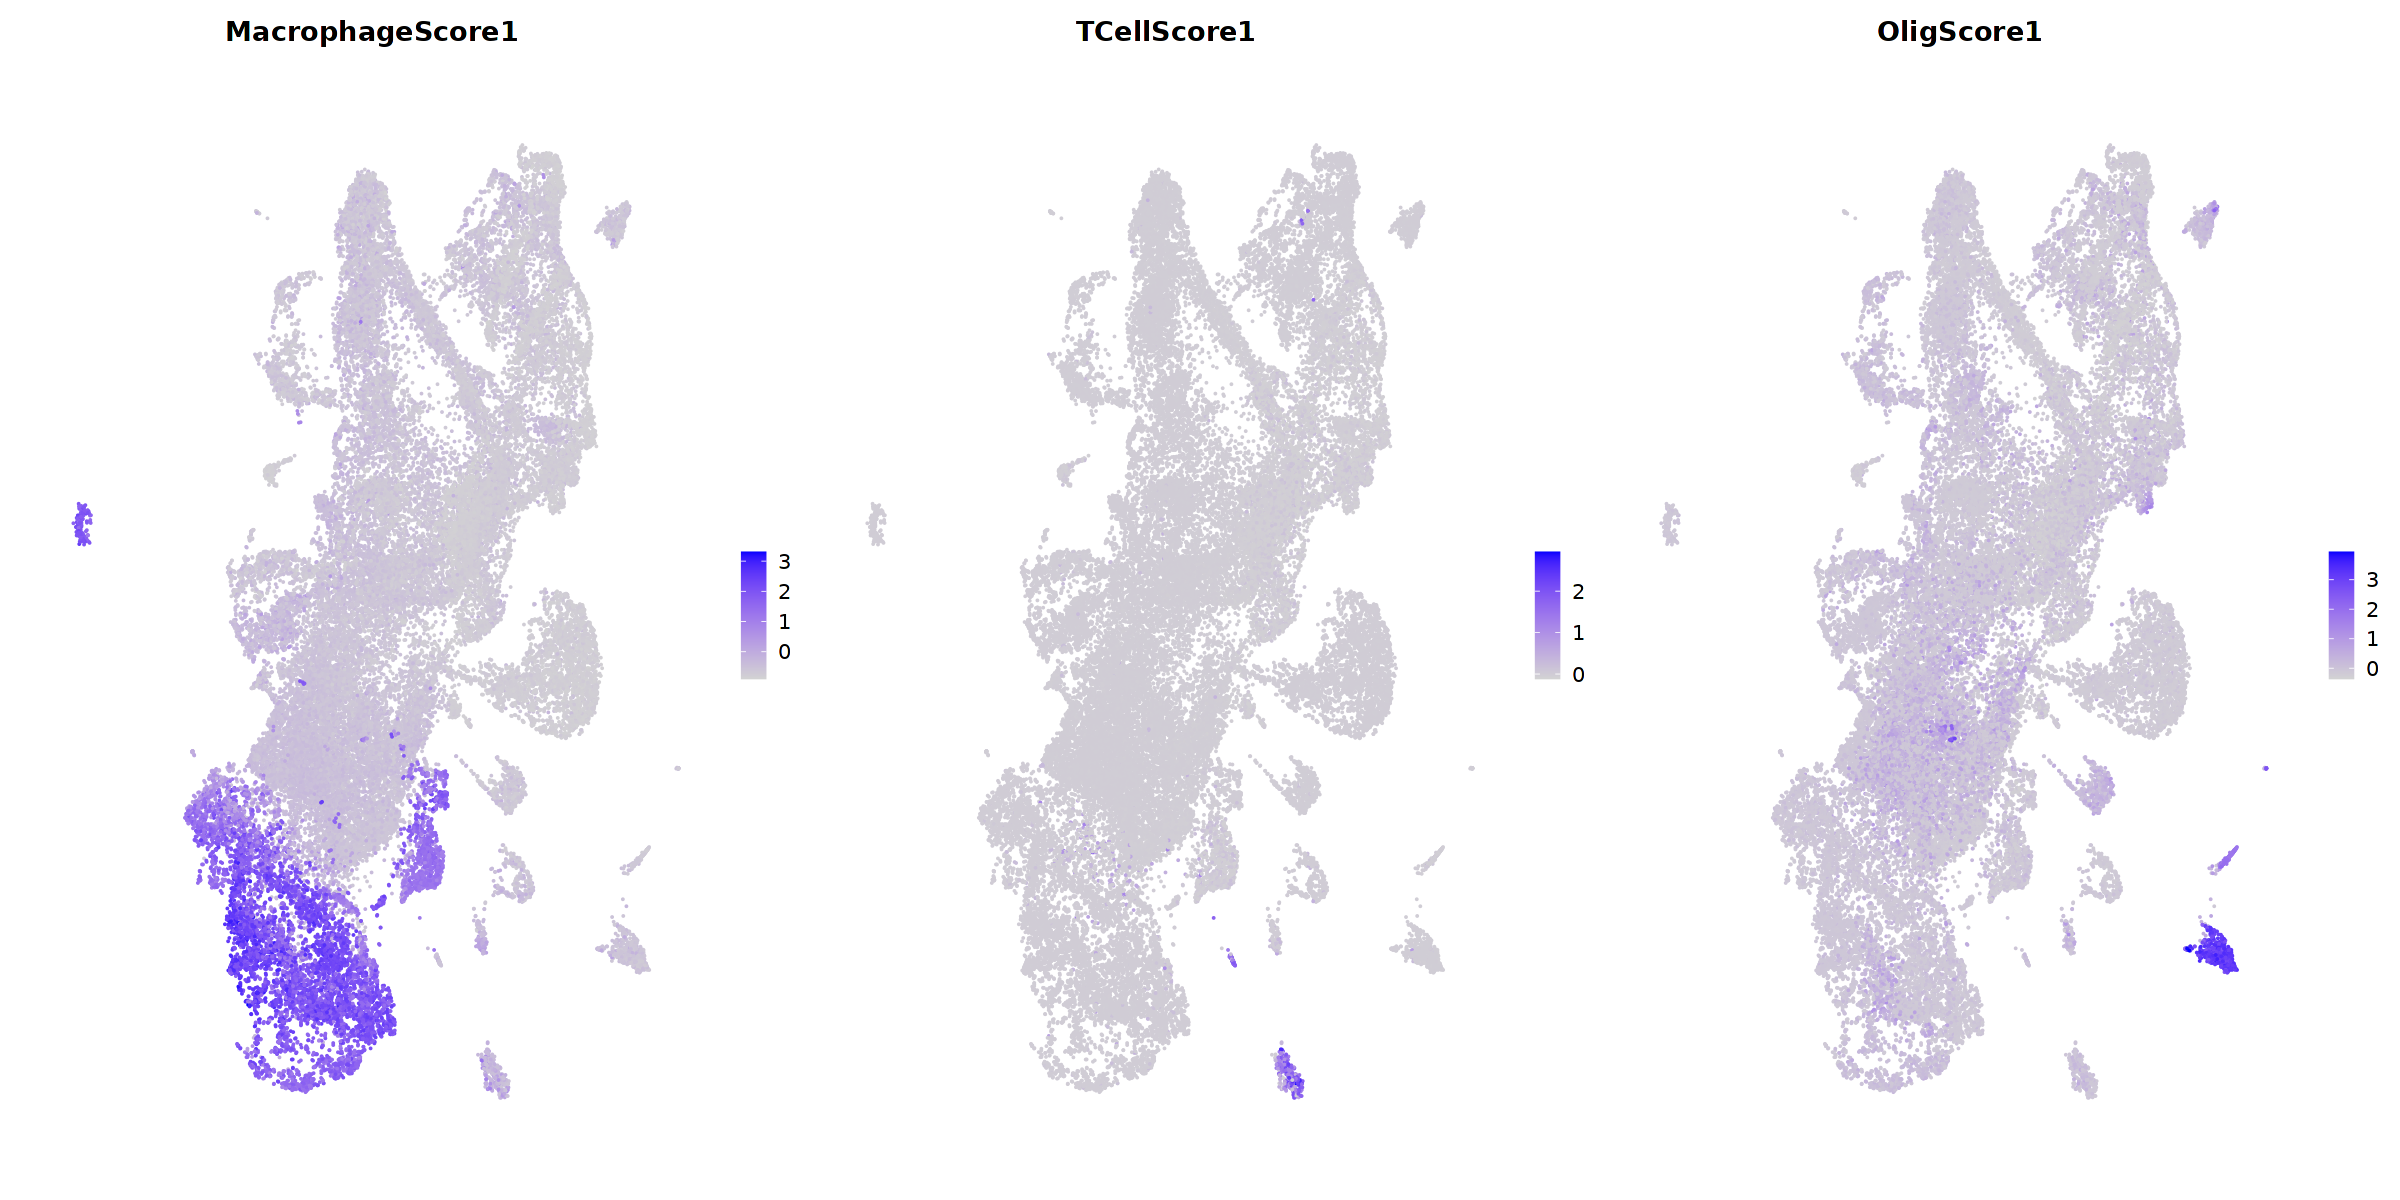

In [35]:
umap.mac <- FeaturePlot(txp.data, reduction = "umap.integrated.cca", features = 'MacrophageScore1') + NoAxes()
umap.t <- FeaturePlot(txp.data, reduction = "umap.integrated.cca", features = 'TCellScore1') + NoAxes() 
umap.olig <- FeaturePlot(txp.data, reduction = "umap.integrated.cca", features = 'OligScore1') + NoAxes() 

options(repr.plot.width=20, repr.plot.height=10) 
umap.mac | umap.t | umap.olig

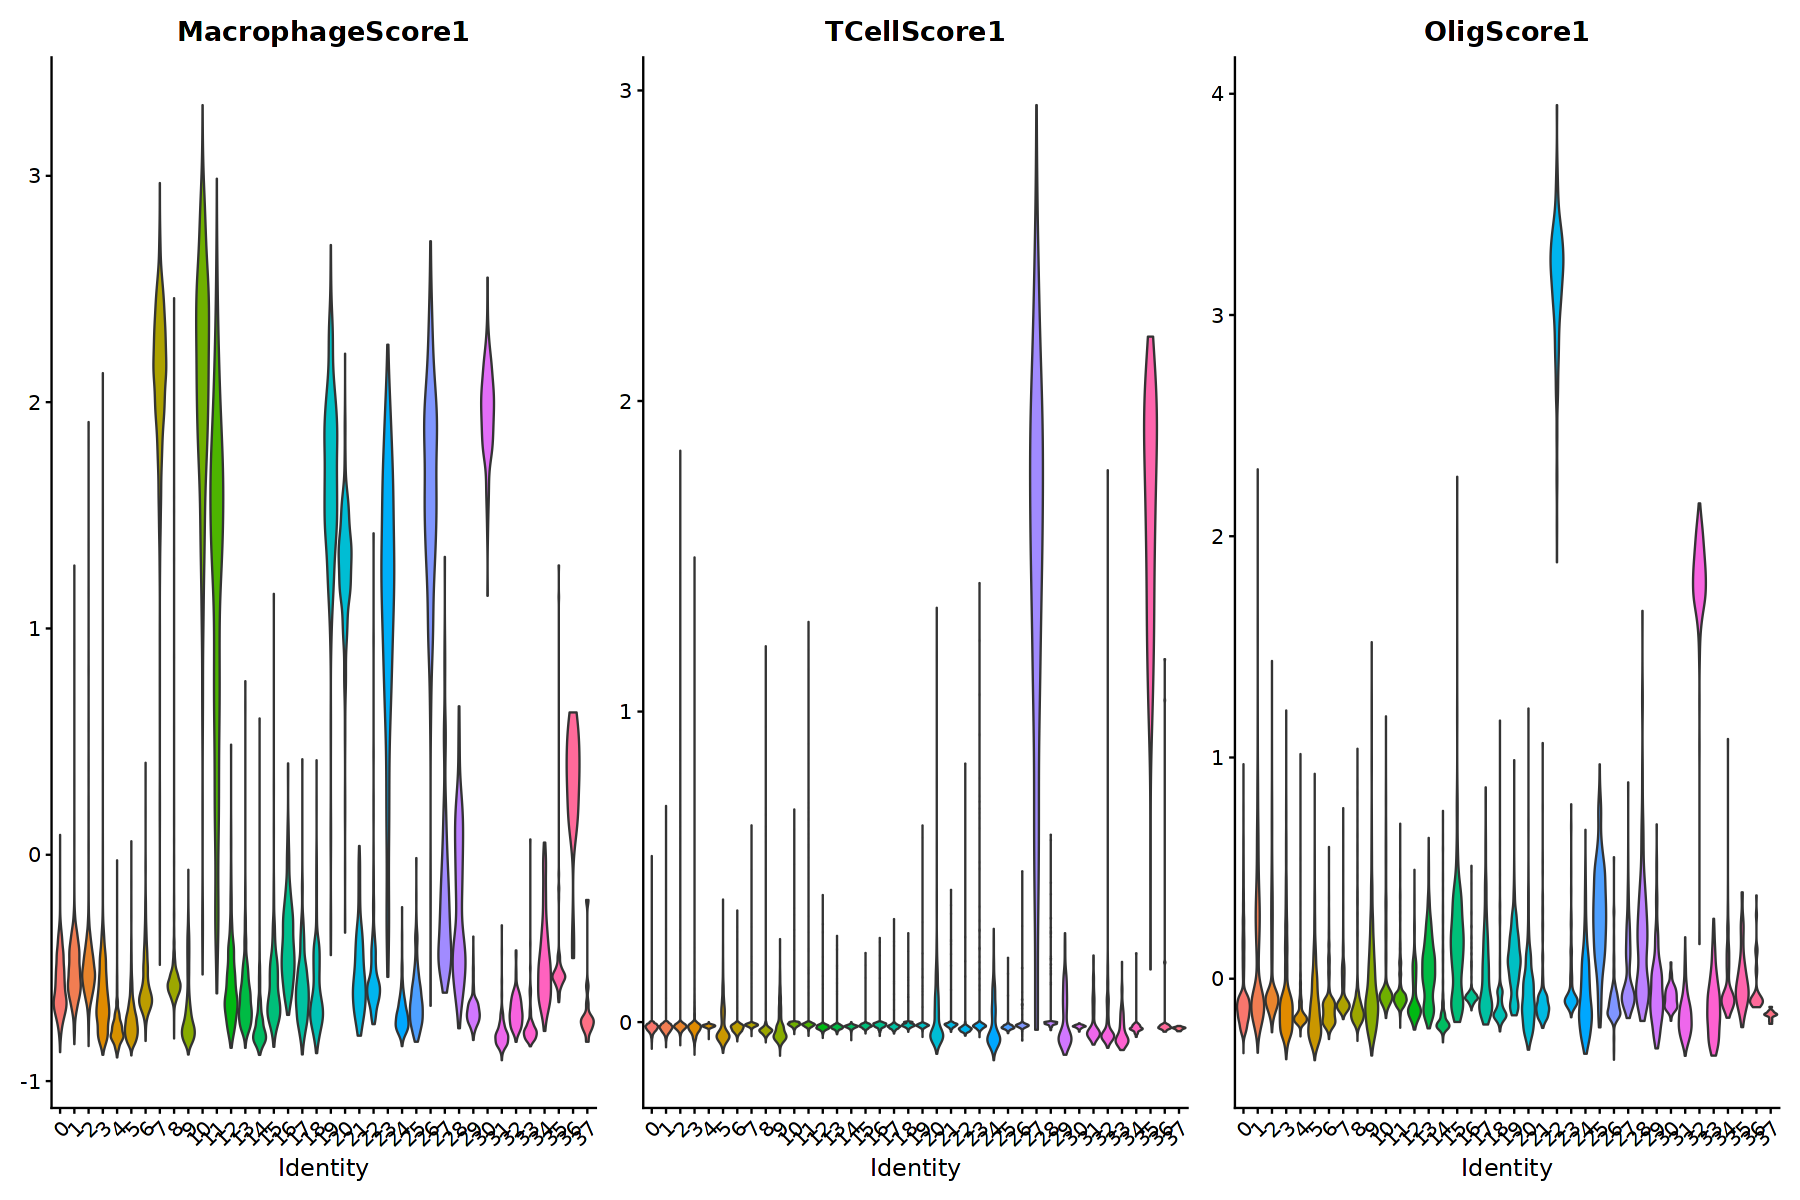

In [36]:
Idents(txp.data) <- "cca_clusters"

vln1 <- VlnPlot(txp.data, features = 'MacrophageScore1', pt.size = 0) + NoLegend()
vln2 <- VlnPlot(txp.data, features = 'TCellScore1', pt.size = 0) + NoLegend()
vln3 <- VlnPlot(txp.data, features = 'OligScore1', pt.size = 0) + NoLegend()

options(repr.plot.width=15, repr.plot.height=10)
vln1 | vln2 | vln3

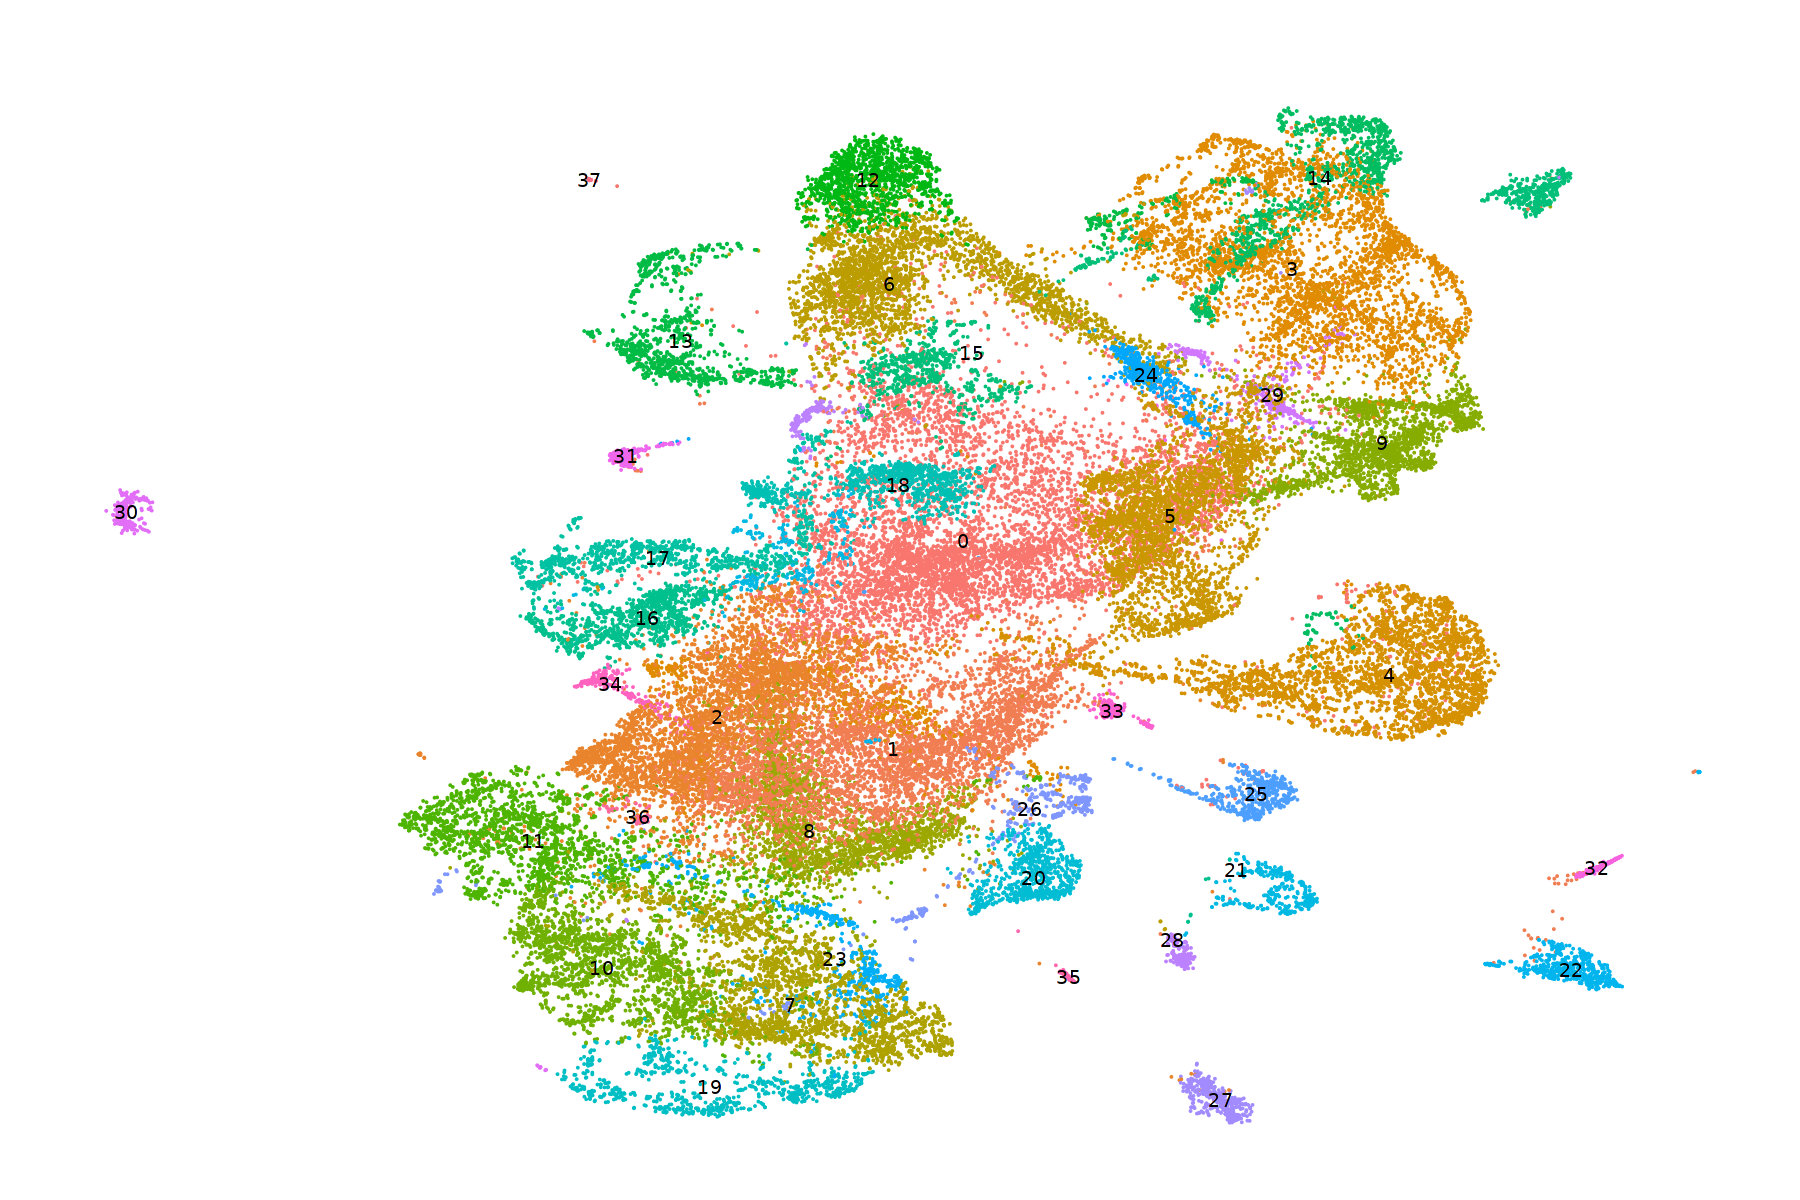

In [37]:
DimPlot(txp.data, reduction = "umap.integrated.cca", group.by = "cca_clusters", label = TRUE) + NoLegend() + NoAxes() + ggtitle("")

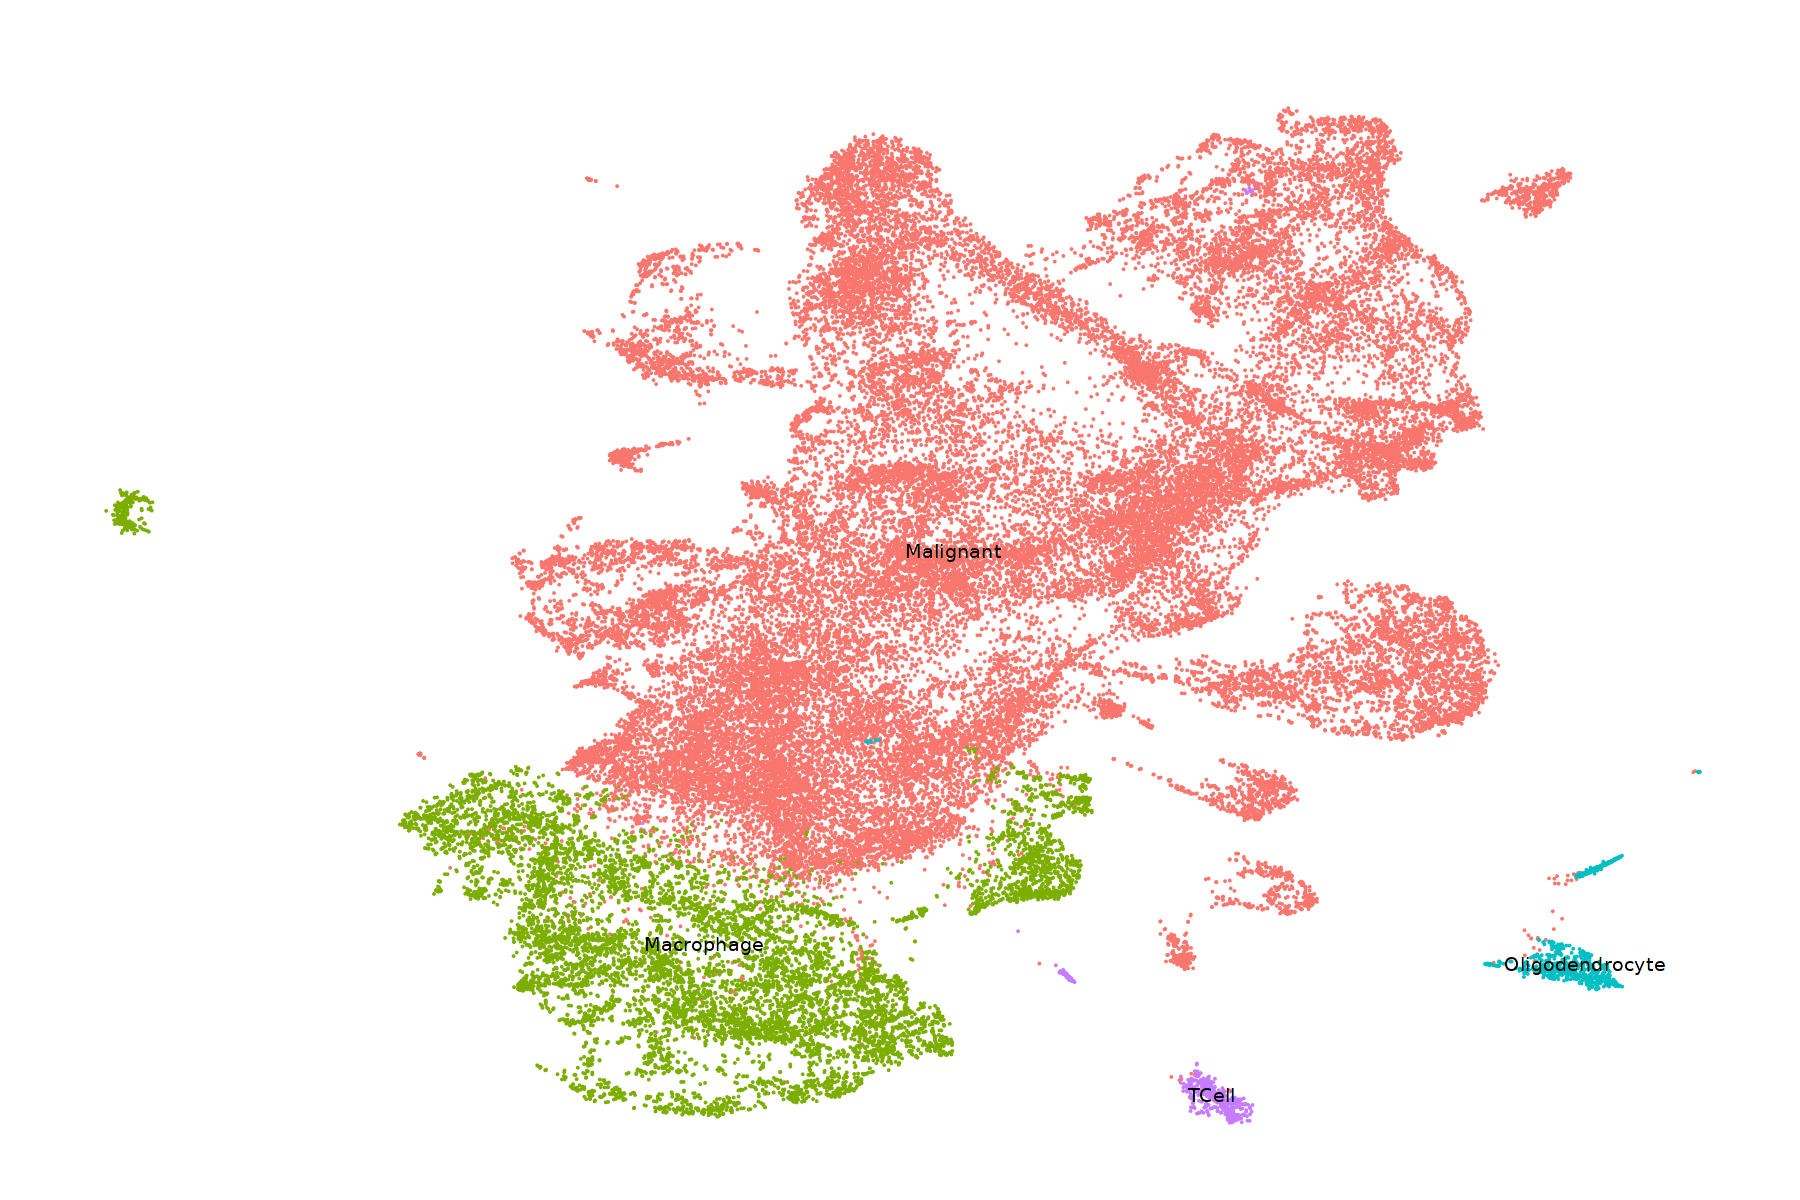

In [38]:
# Set cell types
Idents(txp.data) <- "cca_clusters"
txp.data[["celltype"]] <- Idents(txp.data)
Idents(txp.data) <- "celltype"
txp.data <- RenameIdents(object = txp.data, `0` = "Malignant",`1` = "Malignant",`2` = "Malignant",
                     `3` = "Malignant",`4` = "Malignant",`5` = "Malignant",`6` = "Malignant",
                     `7` = "Macrophage",`8` = "Malignant",`9` = "Malignant",`10` = "Macrophage",`11` = "Macrophage",`12` = "Malignant",
                     `13` = "Malignant",`14` = "Malignant",`15` = "Malignant",`16` = 'Malignant', `17` = 'Malignant',
                     `18` = "Malignant",`19` = "Macrophage",`20` = "Macrophage",`21` = 'Malignant', `22` = 'Oligodendrocyte',`23` = 'Macrophage',
                     `24` = 'Malignant',`25` = "Malignant",`26` = "Macrophage",`27` = "TCell",`28` = 'Malignant',
                     `29` = 'Malignant',`30` = "Macrophage",`31` = "Malignant",`32` = "Oligodendrocyte", `33` = "Malignant",`34` = "Malignant",`35` = "TCell",
                     `36` = "Malignant", `37` = "Malignant")
txp.data[["celltype"]] <- Idents(txp.data)

DimPlot(txp.data, reduction = "umap.integrated.cca", group.by = "celltype", label = TRUE) + NoLegend() + NoAxes() + ggtitle("")
#ggsave("GBMProject/GBMOrganoid/Figures/UMAPs/1mo_celltype.png", plot = umap.celltype)

# Add Module Scores

In [39]:
genelists <- read.csv("GBMProject/GBMOrganoid/Modules.csv", header = TRUE)

#Neftel States Modules
mes1.genelist <- genelists$Neftel_MES1[1:50]
mes2.genelist <- genelists$Neftel_MES2[1:50]
ac.genelist <- genelists$Neftel_AC[1:39]
opc1.genelist <- genelists$Neftel_OPC[1:50]
npc1.genelist <- genelists$Neftel_NPC1[1:50]
npc2.genelist <- genelists$Neftel_NPC2[1:50]
  
txp.data <- AddModuleScore(txp.data, features = list(mes1.genelist), name = "Neftel_MES1", search = TRUE)
txp.data <- AddModuleScore(txp.data, features = list(mes2.genelist), name = "Neftel_MES2", search = TRUE)
txp.data <- AddModuleScore(txp.data, features = list(ac.genelist), name = "Neftel_AC", search = TRUE)
txp.data <- AddModuleScore(txp.data, features = list(opc1.genelist), name = "Neftel_OPC", search = TRUE)
txp.data <- AddModuleScore(txp.data, features = list(npc1.genelist), name = "Neftel_NPC1", search = TRUE)
txp.data <- AddModuleScore(txp.data, features = list(npc2.genelist), name = "Neftel_NPC2", search = TRUE)

#Barkley Cancer Cell State Modules
cycle.genelist <- genelists$Barkley_Cycle[1:297]
stress.genelist <- genelists$Barkley_Stress[1:233]
interferon.genelist <- genelists$Barkley_Interferon[1:136]
hypoxia.genelist <- genelists$Barkley_Hypoxia[1:46]
oxphos.genelist <- genelists$Barkley_Oxphos[1:24]
metal.genelist <- genelists$Barkley_Metal[1:9]
mes3.genelist <- genelists$Barkley_Mesenchymal[1:18]
pemt.genelist <- genelists$Barkley_pEMT[1:144]
alveolar.genelist <- genelists$Barkley_Alveolar[1:16]
basal.genelist <- genelists$Barkley_Basal[1:33]
squamous.genelist <- genelists$Barkley_Squamous[1:64]
gland.genelist <- genelists$Barkley_Glandular[1:70]
cilia.genelist <- genelists$Barkley_Ciliated[1:39]
ac2.genelist <- genelists$Barkley_AC[1:35]
opc3.genelist <- genelists$Barkley_OPC[1:8]
npc3.genelist <- genelists$Barkley_NPC[1:30]

txp.data <- AddModuleScore(txp.data, features = list(cycle.genelist), name = "Barkley_Cycle", search = TRUE) #cycling
txp.data <- AddModuleScore(txp.data, features = list(stress.genelist), name = "Barkley_Stress", search = TRUE) #stress
txp.data <- AddModuleScore(txp.data, features = list(interferon.genelist), name = "Barkley_Interferon", search = TRUE) #interferon
txp.data <- AddModuleScore(txp.data, features = list(hypoxia.genelist), name = "Barkley_Hypoxia", search = TRUE) #hypoxia
txp.data <- AddModuleScore(txp.data, features = list(oxphos.genelist), name = "Barkley_Oxphos", search = TRUE) #oxidative phosphorylation
txp.data <- AddModuleScore(txp.data, features = list(metal.genelist), name = "Barkley_Metal", search = TRUE) #metal
txp.data <- AddModuleScore(txp.data, features = list(mes3.genelist), name = "Barkley_Mesenchymal", search = TRUE) #Mesenchymal
txp.data <- AddModuleScore(txp.data, features = list(pemt.genelist), name = "Barkley_pEMT", search = TRUE) #partial EMT
txp.data <- AddModuleScore(txp.data, features = list(alveolar.genelist), name = "Barkley_Alveolar", search = TRUE) #alveolar
txp.data <- AddModuleScore(txp.data, features = list(basal.genelist), name = "Barkley_Basal", search = TRUE) #basal
txp.data <- AddModuleScore(txp.data, features = list(squamous.genelist), name = "Barkley_Squamous", search = TRUE) #squamous
txp.data <- AddModuleScore(txp.data, features = list(gland.genelist), name = "Barkley_Glandular", search = TRUE) #glandular
txp.data <- AddModuleScore(txp.data, features = list(cilia.genelist), name = "Barkley_Ciliated", search = TRUE) #ciliated
txp.data <- AddModuleScore(txp.data, features = list(ac2.genelist), name = "Barkley_AC", search = TRUE) #astrocyte
txp.data <- AddModuleScore(txp.data, features = list(opc3.genelist), name = "Barkley_OPC", search = TRUE) #oligodendrocyte progenitor
txp.data <- AddModuleScore(txp.data, features = list(npc3.genelist), name = "Barkley_NPC", search = TRUE) #neural progenitor

Warning message:
“The following features are not present in the object: IGFL1, attempting to find updated synonyms”
Warning message:
“No updated symbols found”
Warning message:
“The following features are still not present in the object: IGFL1”
Warning message:
“The following features are not present in the object: MUC5AC, PHGR1, TFF1, TFF2, attempting to find updated synonyms”
Warning message:
“No updated symbols found”
Warning message:
“The following features are still not present in the object: MUC5AC, PHGR1, TFF1, TFF2”


## Add Additional Metadata

In [40]:
meta_column = c()
length = ncol(txp.data)
count = 1
while (count <= length) {
  if(txp.data$orig.ident[count] %in% c("TXP_MES")){
    value = "TXP_MES"
  }
  else if(txp.data$orig.ident[count] %in% c("TXP_PRO")){
    value = "TXP_PRO"
  }
  else if(txp.data$orig.ident[count] %in% c("TXP_WT")){
    value = "TXP_WT"
  }
  else if(txp.data$celltype[count] %in% c("Malignant")){
    value = "PT_Malignant"
  }
  else{
    value = "PT_NM"
  }
      
  meta_column = append(meta_column, value)
  count = count + 1
}

txp.data$source = meta_column

# SAVE CHECKPOINT

In [41]:
saveRDS(txp.data, file = "GBMProject/GBMOrganoid/Checkpoints/3_OrganoidPatient_Integrated.rds")

# Pearson Correlation

In [42]:
## Addition of Sequencing Column 
meta_column = c()
length = ncol(txp.data)
count = 1
while (count <= length) {
  if(txp.data$orig.ident[count] %in% c("TXP_MES")){
    value = "TXP_MES"
  }
  else if(txp.data$orig.ident[count] %in% c("TXP_PRO")){
    value = "TXP_PRO"
  }
  else if(txp.data$orig.ident[count] %in% c("TXP_WT")){
    value = "TXP_WT"
  }
  else if(txp.data$celltype[count] %in% c("Malignant")){
    value = "PT_Malignant"
  }
  else{
    value = "PT_NM"
  }
      
  meta_column = append(meta_column, value)
  count = count + 1
}

txp.data$corr_levels = meta_column

In [43]:
install.packages("viridis")
library(viridis)

Installing package into ‘/storage1/fs1/jmillman/Active/Matt/R_libraries/Race for Your Life.Race for Your Life’
(as ‘lib’ is unspecified)

Loading required package: viridisLite



In [44]:
levels(txp.data$source )

NULL

In [45]:
## Pearson Correlation
dev.off()
Idents(txp.data) <-"source"
DefaultAssay(txp.data) <- 'RNA'
#txp.data$source <- factor(txp.data$source,levels=c('PT-NM', 'PT-Malignant', 'TXP-WT', 'TXP-PRO', 'TXP-MES'))

#txp.data<-FindVariableFeatures(txp.data,assay="RNA") 

av.exp <- AverageExpression(txp.data,features = VariableFeatures(txp.data), assay="RNA",group.by ="source")
av.exp <- as.matrix(av.exp[[1]])
cor.exp <- cor(av.exp,method = "spearman")

null device 
          1

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
Names of identity class contain underscores ('_'), replacing with dashes ('-')
This message is displayed once every 8 hours.


In [46]:
cor.exp

PT-Malignant PT-NM     TXP-MES   TXP-PRO   TXP-WT   
PT-Malignant 1.0000000    0.6348649 0.5836755 0.3741130 0.3021075
PT-NM        0.6348649    1.0000000 0.3066901 0.1155397 0.5013687
TXP-MES      0.5836755    0.3066901 1.0000000 0.6463144 0.3312513
TXP-PRO      0.3741130    0.1155397 0.6463144 1.0000000 0.4600016
TXP-WT       0.3021075    0.5013687 0.3312513 0.4600016 1.0000000

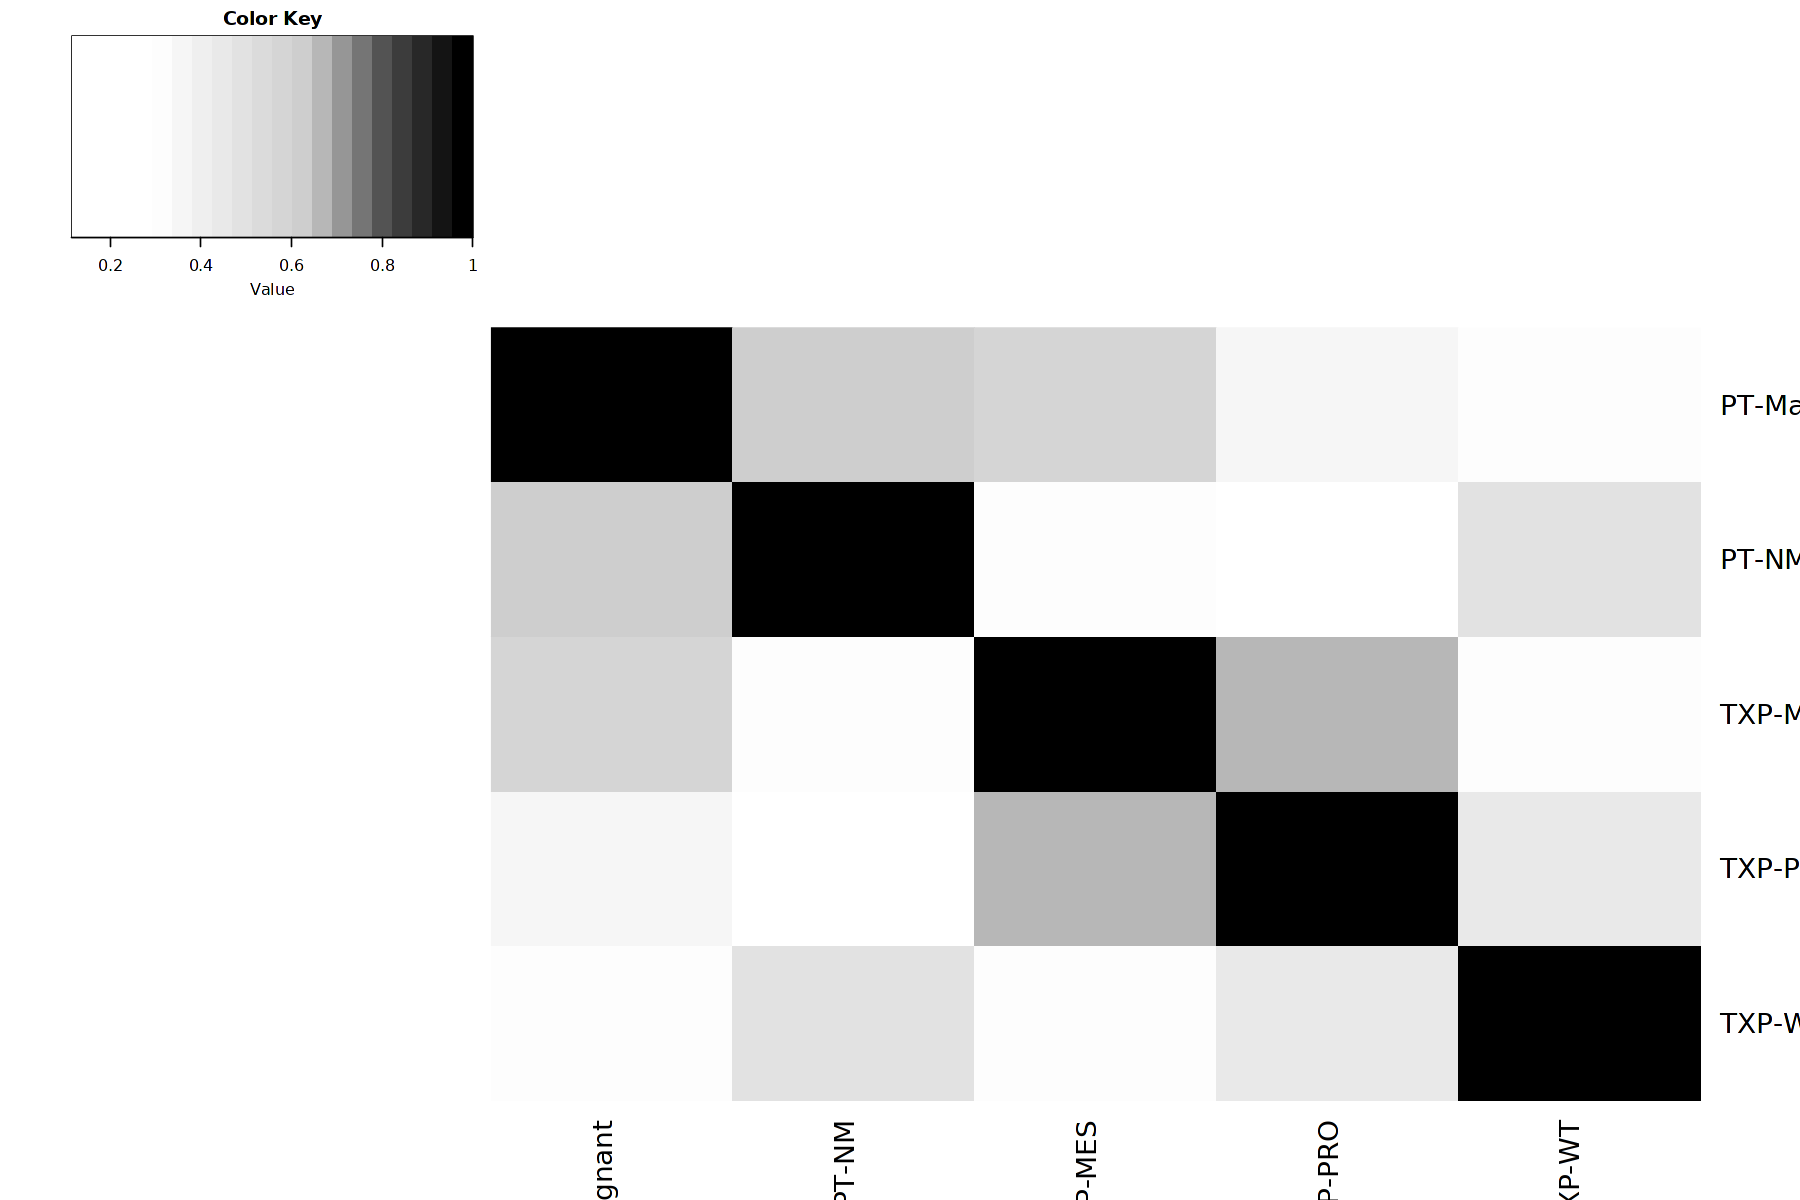

In [47]:
palette = colorRampPalette(c("White","Grey100","Grey90","Grey80","Grey30","Grey0")) (20)
heatmap.2(x = cor.exp, col = palette,trace="none",density.info='none',dendrogram="none",Colv=FALSE,Rowv=FALSE)

In [48]:
#palette = brewer.pal(8, "YlOrRd")
palette = colorRampPalette(c("White","Grey","Black")) (10)

# Extra Stuff

In [49]:
# Calculate cell type proportions
prop.celltype <- data.frame(prop.table(table(txp.data$cca_clusters,txp.data$source)))

colnames(prop.celltype) <- c("Cluster","Source", "Frac")
prop.celltype$Cluster <- as.character(prop.celltype$Cluster)

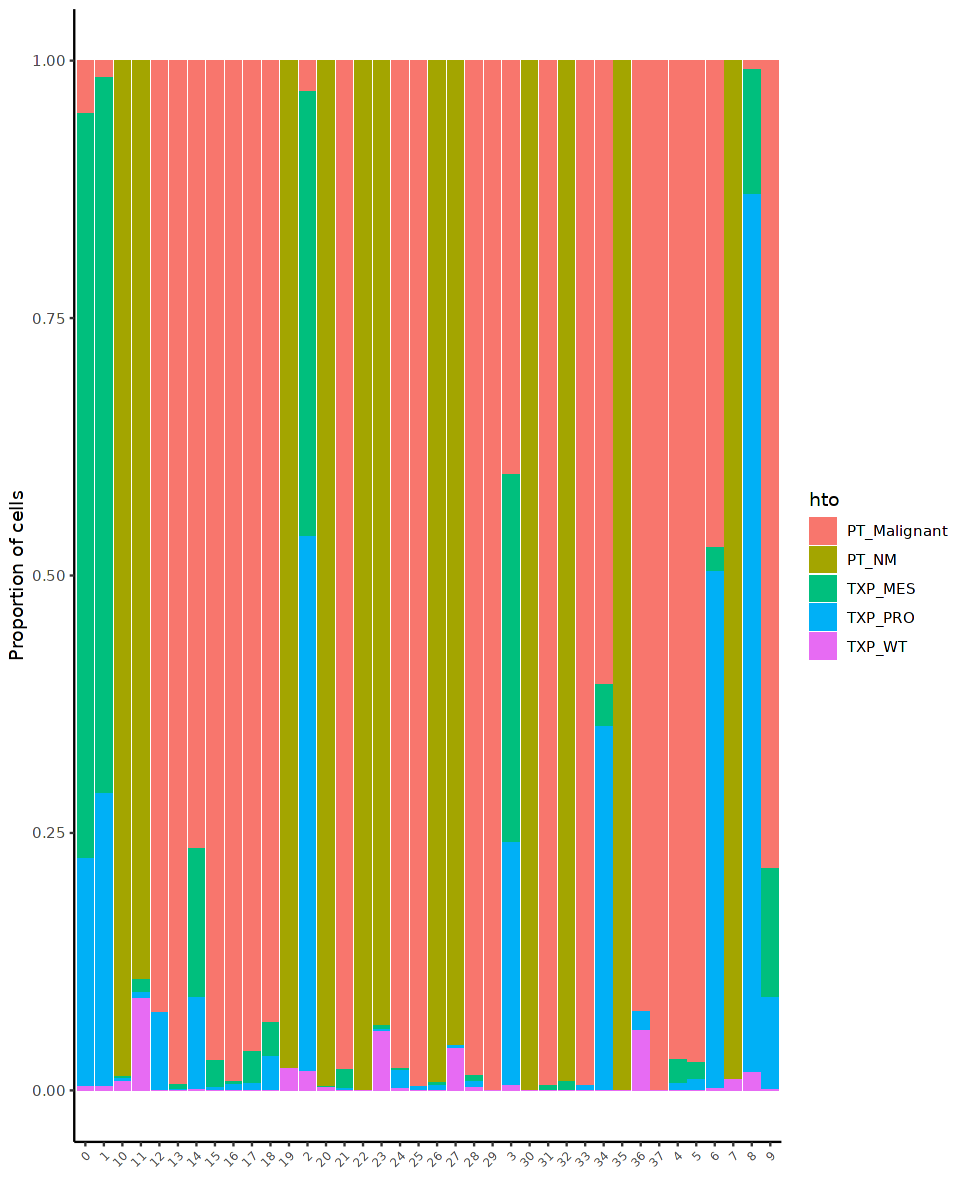

In [50]:
options(repr.plot.width = 8, repr.plot.height = 10)

prop.plot <- ggplot(prop.celltype, aes(fill=factor(Source), y=Frac, x=Cluster)) +
  geom_bar(position="fill", stat="identity", width = .9) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7)) +
  labs(x = "", y = "Proportion of cells") +
  guides(fill = guide_legend(title="hto"))
  #scale_fill_manual(values=c("forestgreen","mediumorchid","dodgerblue3")) + NoLegend()

prop.plot

In [51]:
# Calculate cell type proportions
prop.celltype <- data.frame(prop.table(table(txp.data$celltype,txp.data$source)))

colnames(prop.celltype) <- c("Celltype","Source", "Frac")
prop.celltype$Celltype <- as.character(prop.celltype$Celltype)

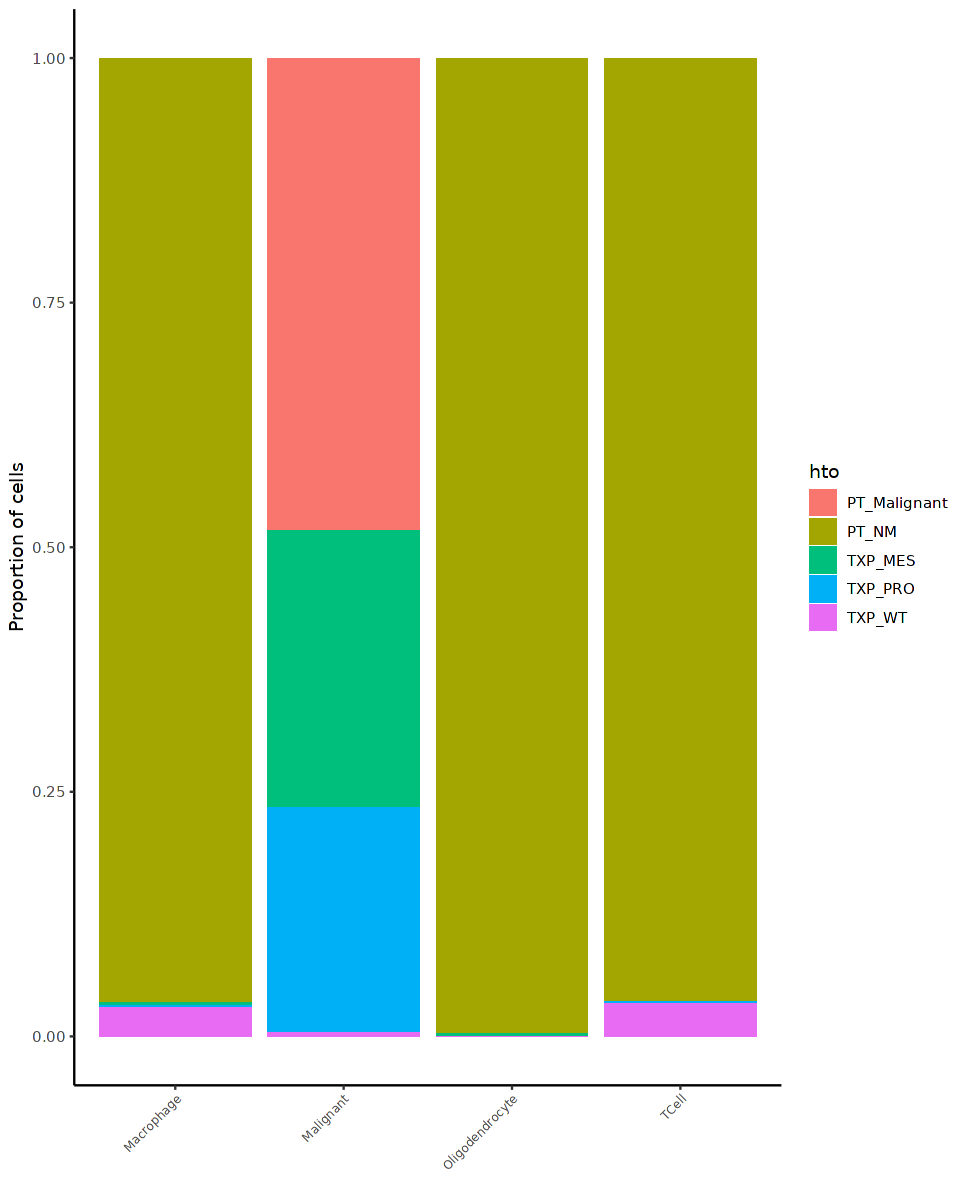

In [52]:
options(repr.plot.width = 8, repr.plot.height = 10)

prop.plot <- ggplot(prop.celltype, aes(fill=factor(Source), y=Frac, x=Celltype)) +
  geom_bar(position="fill", stat="identity", width = .9) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7)) +
  labs(x = "", y = "Proportion of cells") +
  guides(fill = guide_legend(title="hto"))
  #scale_fill_manual(values=c("forestgreen","mediumorchid","dodgerblue3")) + NoLegend()

prop.plot

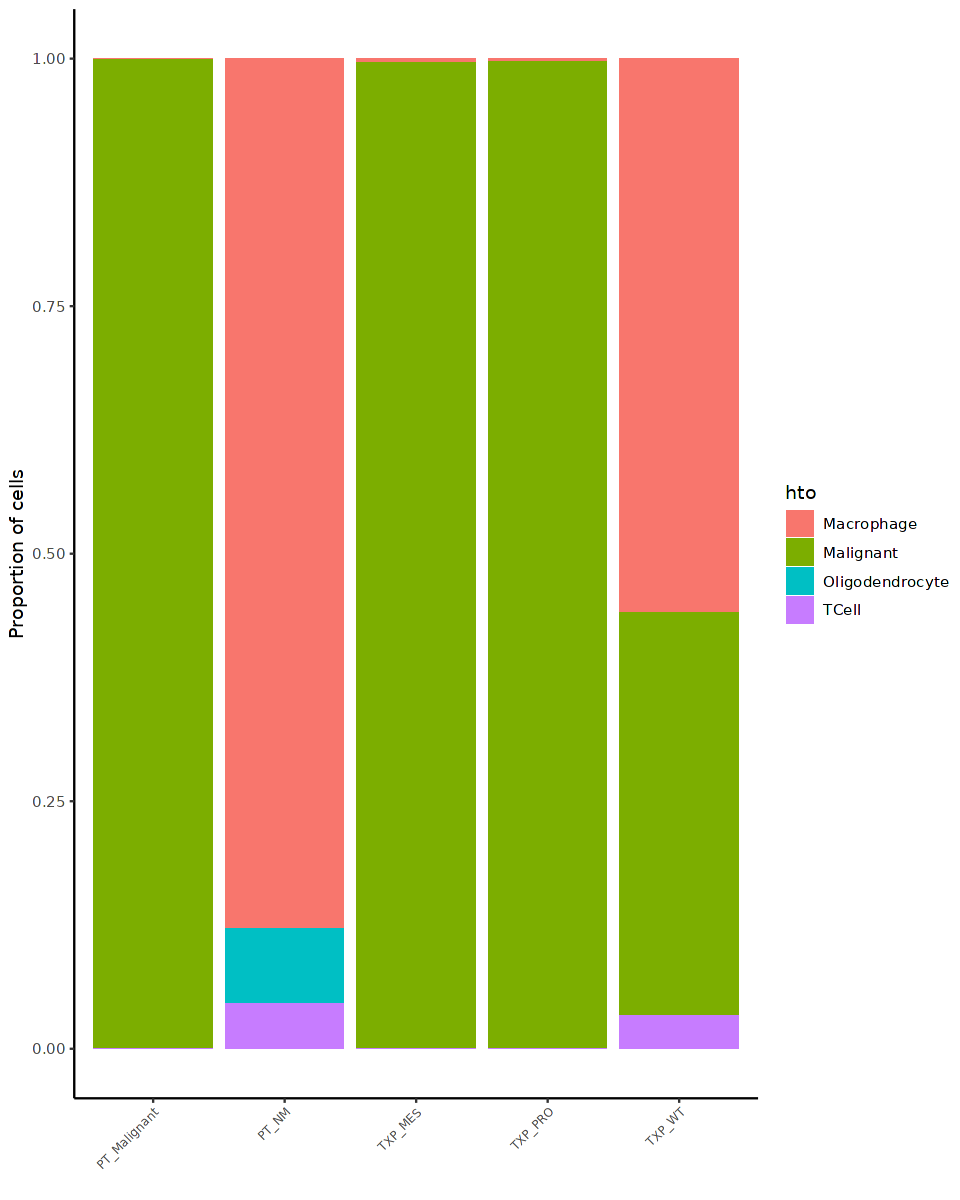

In [53]:
options(repr.plot.width = 8, repr.plot.height = 10)

prop.plot <- ggplot(prop.celltype, aes(fill=factor(Celltype), y=Frac, x=Source)) +
  geom_bar(position="fill", stat="identity", width = .9) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7)) +
  labs(x = "", y = "Proportion of cells") +
  guides(fill = guide_legend(title="hto"))
  #scale_fill_manual(values=c("forestgreen","mediumorchid","dodgerblue3")) + NoLegend()

prop.plot